In [123]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [124]:
df = pd.read_csv('final_featured.csv')

In [125]:
df.head()

,Unnamed: 0,Month_Year,gmv,units,sla,product_mrp,product_procurement_sla,order_date_only,is_holiday,Month,...,product_analytic_vertical_Strap,product_analytic_vertical_TVOutCableAccessory,product_analytic_vertical_Teleconverter,product_analytic_vertical_Telescope,product_analytic_vertical_VideoGlasses,product_analytic_vertical_VideoPlayer,product_analytic_vertical_VoiceRecorder,product_analytic_vertical_\N,order_payment_type_COD,order_payment_type_Prepaid
0,2,2023-07,1980.946588,1.025428,6.181534,3299.582581,4.344711,53:18.4,0.000316,7,...,0.000936,0.004093,0.0,0.000925,0.015392,0.013881,0.002515,0.000226,0.726768,0.273232
1,3,2023-08,1544.996310,1.014760,5.682657,2423.306273,2.678967,32:46.1,0.022140,8,...,0.000000,0.022140,0.0,0.000000,0.018450,0.007380,0.000000,0.000000,0.738007,0.261993
2,4,2023-09,2029.912231,1.022973,5.745160,3281.805069,6.218172,17:14.2,0.032944,9,...,0.000793,0.007992,0.0,0.001233,0.017906,0.015468,0.002696,0.000268,0.762856,0.237144
3,5,2023-10,2442.223547,1.022373,5.599346,4439.025272,3.749480,36:10.2,0.032865,10,...,0.000574,0.003468,0.0,0.000584,0.014245,0.011409,0.001384,0.005552,0.745896,0.254104
4,6,2023-11,2559.420651,1.024132,5.693794,4146.426281,4.558090,31:34.7,0.039400,11,...,0.000883,0.004447,0.0,0.000614,0.018878,0.010299,0.001344,0.001152,0.788799,0.211201


In [126]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]

# Calculate correlations with GMV
correlations = numeric_df.corr()['gmv'].sort_values(ascending=False)

# Display correlations
print("\nCorrelations with GMV:")
print(correlations)

# Create a heatmap of correlations using plotly
import plotly.graph_objects as go

heatmap_fig = go.Figure(data=go.Heatmap(
    z=numeric_df.corr()[['gmv']].values.T,
    x=numeric_df.corr()[['gmv']].index,
    y=['GMV'],
    colorscale='RdBu',
    zmid=0,
    text=numeric_df.corr()[['gmv']].values.T,
    texttemplate='%{text:.2f}',
    textfont={"size": 10},
    hoverongaps=False
))

heatmap_fig.update_layout(
    title='Correlation with GMV',
    height=800,
    width=1600
)
heatmap_fig.show()

# Create a bar plot of top 15 correlations using plotly
bar_fig = go.Figure(data=go.Bar(
    x=correlations.head(15).index,
    y=correlations.head(15).values,
    text=correlations.head(15).values.round(3),
    textposition='auto',
    textangle=-90
))

bar_fig.update_layout(
    title='Top 15 Correlations with GMV',
    xaxis_tickangle=45,
    height=600,
    width=1600,
    showlegend=False
)
bar_fig.show()

# Calculate key statistics for GMV
print("\nKey Statistics for GMV:")
print(df['gmv'].describe())


Correlations with GMV:
gmv                                                  1.000000
List Price                                           0.994067
product_mrp                                          0.967996
product_analytic_vertical_DSLR                       0.926962
product_analytic_sub_category_Camera                 0.918422
product_analytic_category_Camera                     0.918422
product_analytic_vertical_GamingConsole              0.840773
 Affiliates                                          0.806301
Online marketing                                     0.774304
product_analytic_vertical_GamingAdapter              0.755459
product_analytic_vertical_PhysicalGame               0.702684
product_analytic_sub_category_Game                   0.698687
product_analytic_category_GameCDDVD                  0.697518
product_analytic_vertical_SportsAndAction            0.674530
Unnamed: 0                                           0.667840
product_analytic_sub_category_GamingConsole   


Key Statistics for GMV:
count      12.000000
mean     2382.443100
std       358.829165
min      1544.996310
25%      2233.382996
50%      2519.756474
75%      2613.950636
max      2755.722445
Name: gmv, dtype: float64


In [127]:
# Create a new dataframe with the last 6 columns from df1
last_six_columns = df.iloc[:, -6:]
print("\nNew dataframe with last 6 columns:")
print(last_six_columns.head())
print("\nColumns in new dataframe:")
print(last_six_columns.columns)



New dataframe with last 6 columns:
   product_analytic_vertical_VideoGlasses  \
0                                0.015392   
1                                0.018450   
2                                0.017906   
3                                0.014245   
4                                0.018878   

   product_analytic_vertical_VideoPlayer  \
0                               0.013881   
1                               0.007380   
2                               0.015468   
3                               0.011409   
4                               0.010299   

   product_analytic_vertical_VoiceRecorder  product_analytic_vertical_\N  \
0                                 0.002515                      0.000226   
1                                 0.000000                      0.000000   
2                                 0.002696                      0.000268   
3                                 0.001384                      0.005552   
4                                 0.001344      

In [128]:
# Create a new dataframe with monthly means
monthly_df = df.groupby('month')[['avg_order_value_daily', 'avg_order_value_weekly',
                                 'avg_order_value_monthly', 'revenue_per_customer_monthly',
                                 'revenue_per_customer_weekly']].mean().reset_index()

# Display the result
print("Number of unique months:", len(monthly_df))
print("\nMonthly averages:")
print(monthly_df)

Number of unique months: 12

Monthly averages:
      month  avg_order_value_daily  avg_order_value_weekly  \
0   2023-07            2003.584740             2004.247844   
1   2023-08            2937.101169             3346.292380   
2   2023-09            4206.022986             4151.776756   
3   2023-10            2498.438613             2522.530638   
4   2023-11            2614.984235             2614.465500   
5   2023-12            2824.704215             2836.729922   
6   2024-01            2755.140987             2735.935186   
7   2024-02            2345.759491             2377.451021   
8   2024-03            2703.085907             2691.190581   
9   2024-04            2603.185582             2615.889547   
10  2024-05            2670.094793             2645.115972   
11  2024-06            2568.497129             2600.835526   

    avg_order_value_monthly  revenue_per_customer_monthly  \
0               2006.949142                   2240.140346   
1               2701.251

In [129]:
# Remove first 2 and last row from the monthly averages dataframe
monthly_df = monthly_df.iloc[2:-1]

# Display the updated dataframe
print("\nMonthly averages after removing rows:")
print(monthly_df)



Monthly averages after removing rows:
      month  avg_order_value_daily  avg_order_value_weekly  \
2   2023-09            4206.022986             4151.776756   
3   2023-10            2498.438613             2522.530638   
4   2023-11            2614.984235             2614.465500   
5   2023-12            2824.704215             2836.729922   
6   2024-01            2755.140987             2735.935186   
7   2024-02            2345.759491             2377.451021   
8   2024-03            2703.085907             2691.190581   
9   2024-04            2603.185582             2615.889547   
10  2024-05            2670.094793             2645.115972   

    avg_order_value_monthly  revenue_per_customer_monthly  \
2               4212.746503                   4589.300017   
3               2503.636624                   2786.663126   
4               2618.444912                   2917.947962   
5               2829.854685                   3161.256177   
6               2755.626416        

Original dataset shape: (12, 137)
Dataset shape after removing NaN values: (12, 137)

Top 10 important features from Random Forest:
                                      feature  importance
26                                 List Price    0.062031
3                                 product_mrp    0.048610
100  product_analytic_vertical_GamingMousePad    0.043476
103      product_analytic_vertical_HiFiSystem    0.042228
65    product_analytic_vertical_CameraBattery    0.042198
53           product_analytic_category_Camera    0.041488
29                              Min Temp (°C)    0.028418
76     product_analytic_vertical_CameraTripod    0.026392
24                                  NPS_Score    0.026369
9                          Cool Deg Days (°C)    0.025714


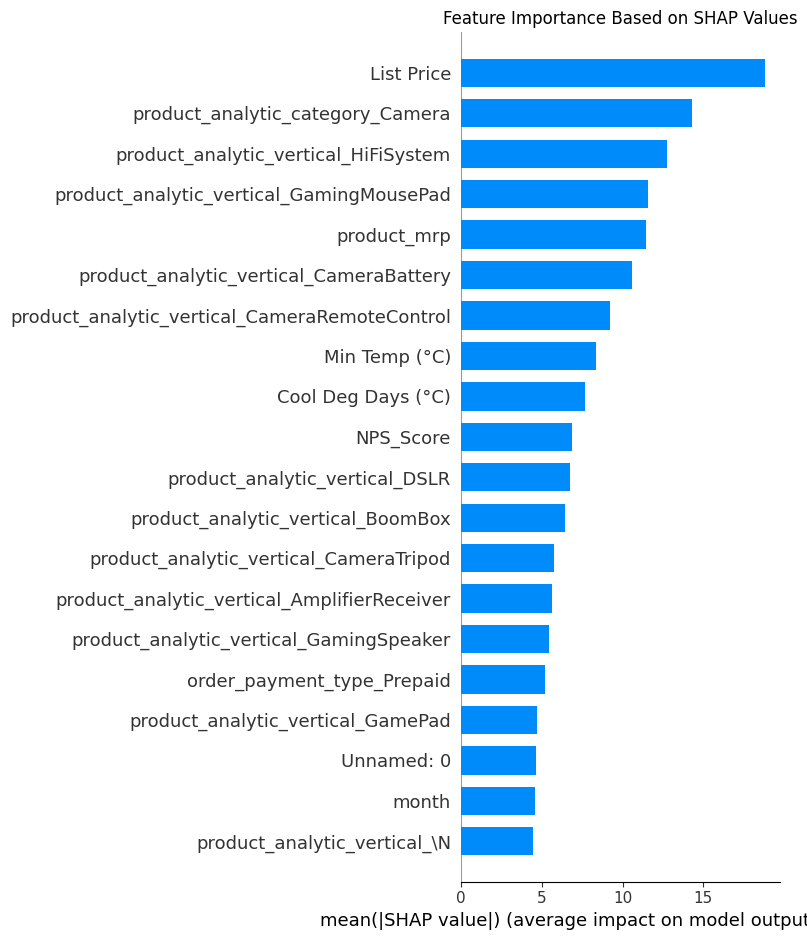

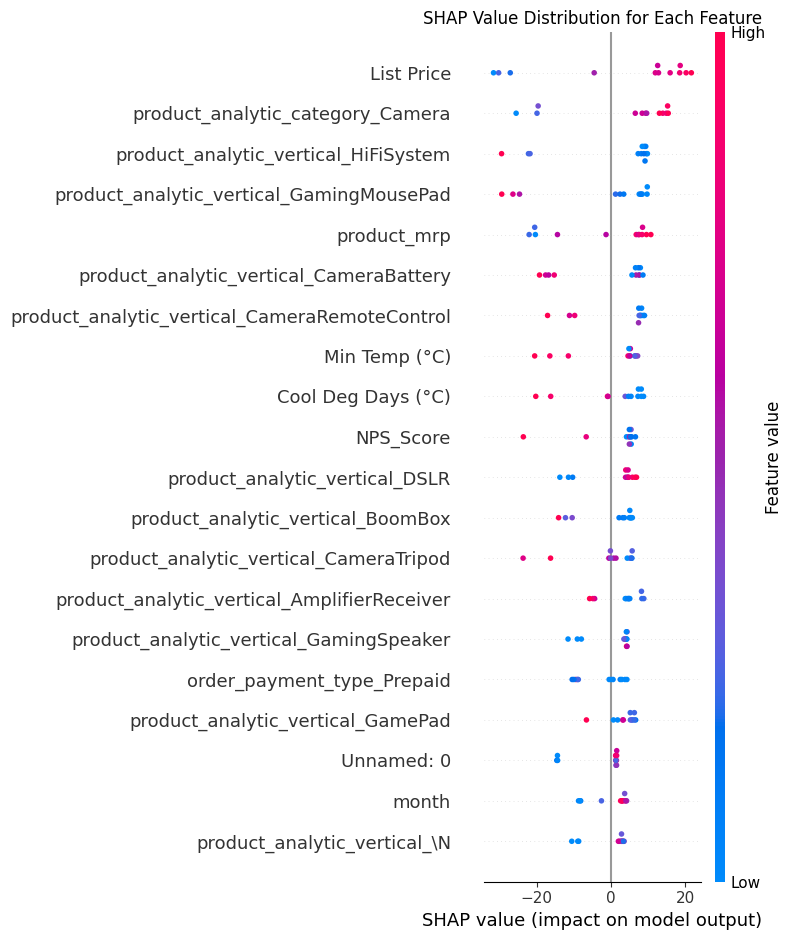


Top 10 most important features based on SHAP values:
                                           feature  SHAP_importance
26                                      List Price        18.794533
53                product_analytic_category_Camera        14.281658
103           product_analytic_vertical_HiFiSystem        12.745507
100       product_analytic_vertical_GamingMousePad        11.592808
3                                      product_mrp        11.457591
65         product_analytic_vertical_CameraBattery        10.576273
74   product_analytic_vertical_CameraRemoteControl         9.215343
29                                   Min Temp (°C)         8.352137
9                               Cool Deg Days (°C)         7.654968
24                                       NPS_Score         6.861244


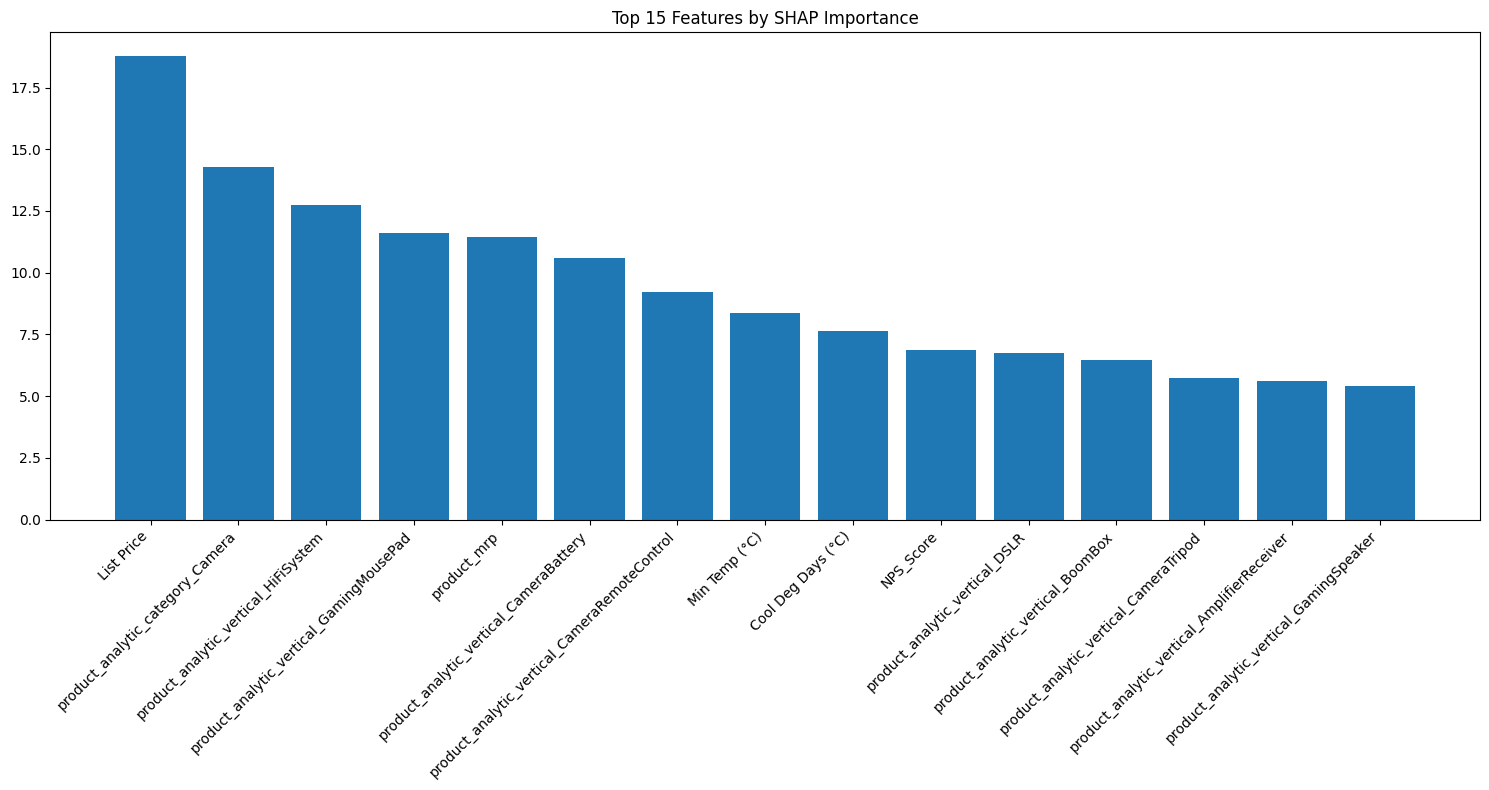

In [130]:
# ... existing code ...
# Import required libraries
import shap
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Set matplotlib to inline mode
plt.ion()

# Create a copy of the dataframe and remove rows with NaN values
df_clean = df.dropna()
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing NaN values: {df_clean.shape}")

# Prepare the data
X = df_clean.copy()

# Drop the target variable and date columns
columns_to_drop = ['gmv', 'Month_Year', 'order_date_only']
X = X.drop(columns_to_drop, axis=1)

# Convert any remaining categorical columns to numeric using LabelEncoder
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Get the target variable
y = df_clean['gmv']

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Print feature importances from the Random Forest model
feature_importance_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})
feature_importance_rf = feature_importance_rf.sort_values('importance', ascending=False)

print("\nTop 10 important features from Random Forest:")
print(feature_importance_rf.head(10))

# Create SHAP summary plot (bar)
plt.figure(figsize=(15, 10))
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title("Feature Importance Based on SHAP Values")
plt.tight_layout()
plt.show()

# Create detailed SHAP summary plot
plt.figure(figsize=(15, 10))
shap.summary_plot(shap_values, X, show=False)
plt.title("SHAP Value Distribution for Each Feature")
plt.tight_layout()
plt.show()

# Calculate and display mean absolute SHAP values
mean_shap = np.abs(shap_values).mean(axis=0)
feature_importance_shap = pd.DataFrame({
    'feature': X.columns,
    'SHAP_importance': mean_shap
})
feature_importance_shap = feature_importance_shap.sort_values('SHAP_importance', ascending=False)

print("\nTop 10 most important features based on SHAP values:")
print(feature_importance_shap.head(10))

# Create a bar plot of SHAP importance values
plt.figure(figsize=(15, 8))
plt.bar(feature_importance_shap['feature'].head(15), feature_importance_shap['SHAP_importance'].head(15))
plt.xticks(rotation=45, ha='right')
plt.title('Top 15 Features by SHAP Importance')
plt.tight_layout()
plt.show()
# ... existing code ...

Fitting Linear Regression model...

Model Performance:
Training R² Score: 1.0000
Testing R² Score: 0.8689
Training MSE: 0.0000
Testing MSE: 10154.8246
Training MAE: 0.0000
Testing MAE: 91.6380

Top 15 most important features:
                                           Feature  Coefficient  \
26                                      List Price    16.618712   
65         product_analytic_vertical_CameraBattery   -15.291183   
94         product_analytic_vertical_GamingConsole    13.914543   
3                                      product_mrp    13.830418   
87      product_analytic_vertical_FlashShoeAdapter   -13.359069   
80                  product_analytic_vertical_DSLR    12.937038   
91    product_analytic_vertical_GamingAccessoryKit    11.969105   
53                product_analytic_category_Camera    11.959581   
42            product_analytic_sub_category_Camera    11.959581   
92         product_analytic_vertical_GamingAdapter    11.847522   
118        product_analytic_vertical_

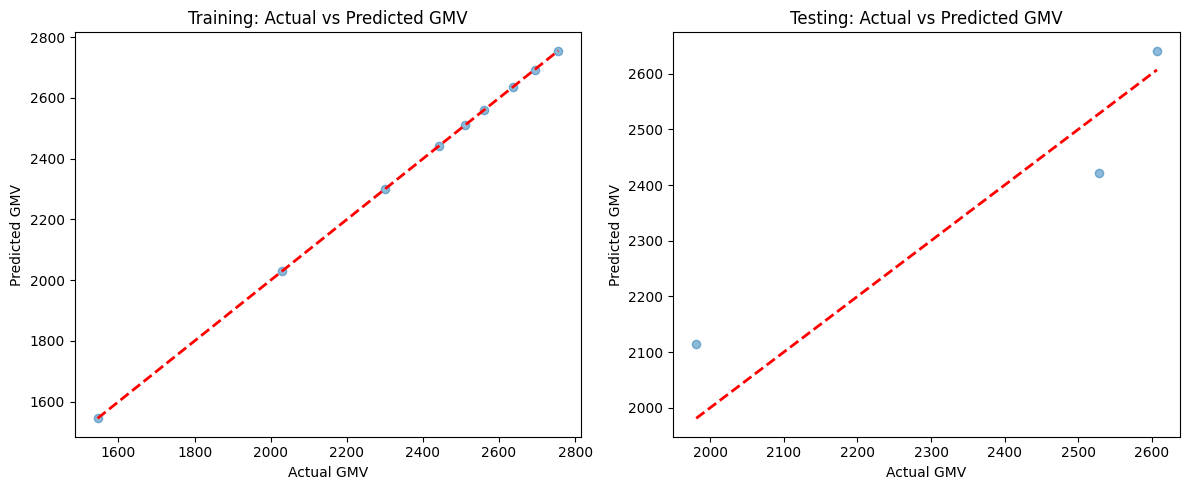

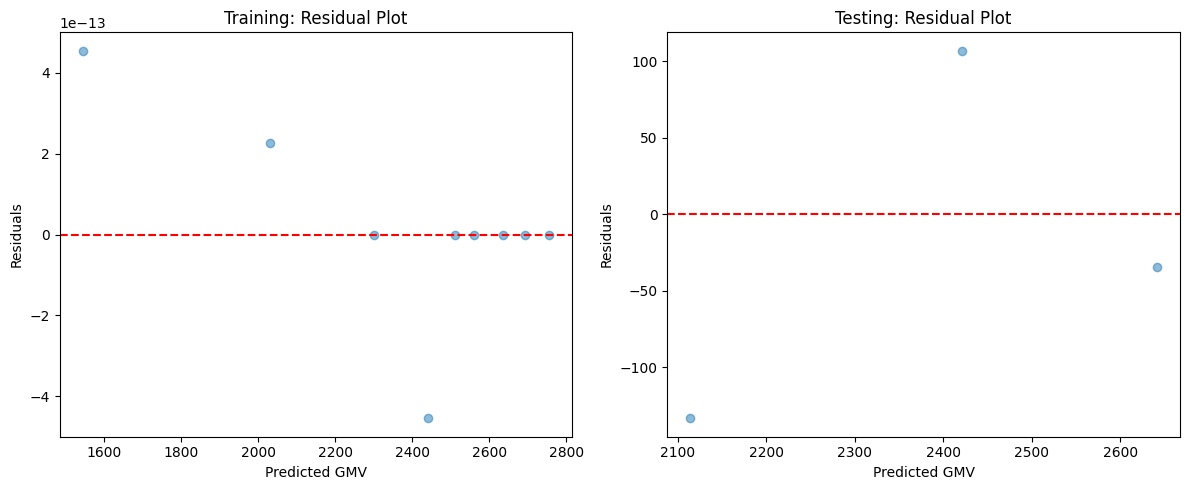

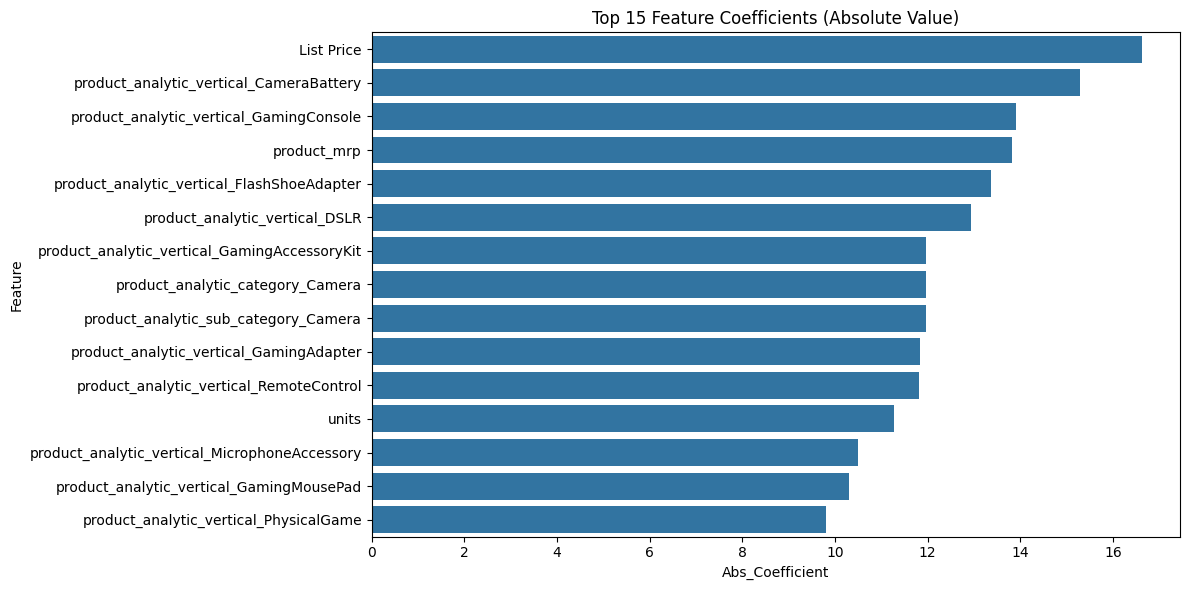


Cross-validation scores:
Mean R² Score: -4.1144 (+/- 5.5248)

Regularized Models Performance:
Ridge - Training R²: 0.9999, Testing R²: 0.8692
Lasso - Training R²: 1.0000, Testing R²: 0.9764


C:\Users\KRITYAPRIYA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.976e+02, tolerance: 1.184e+02



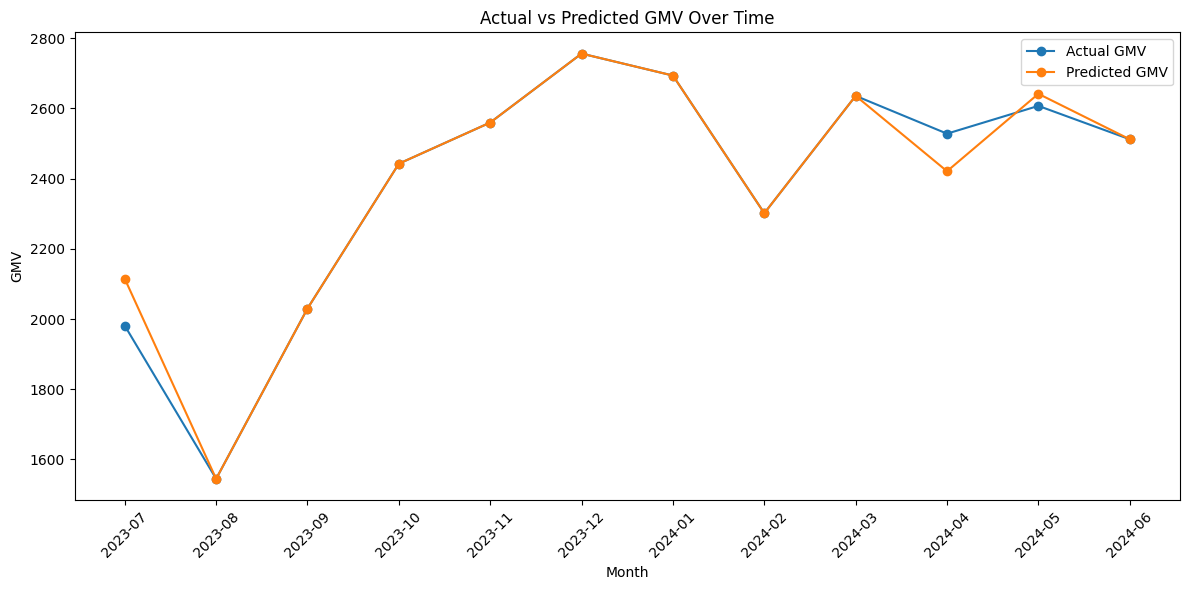

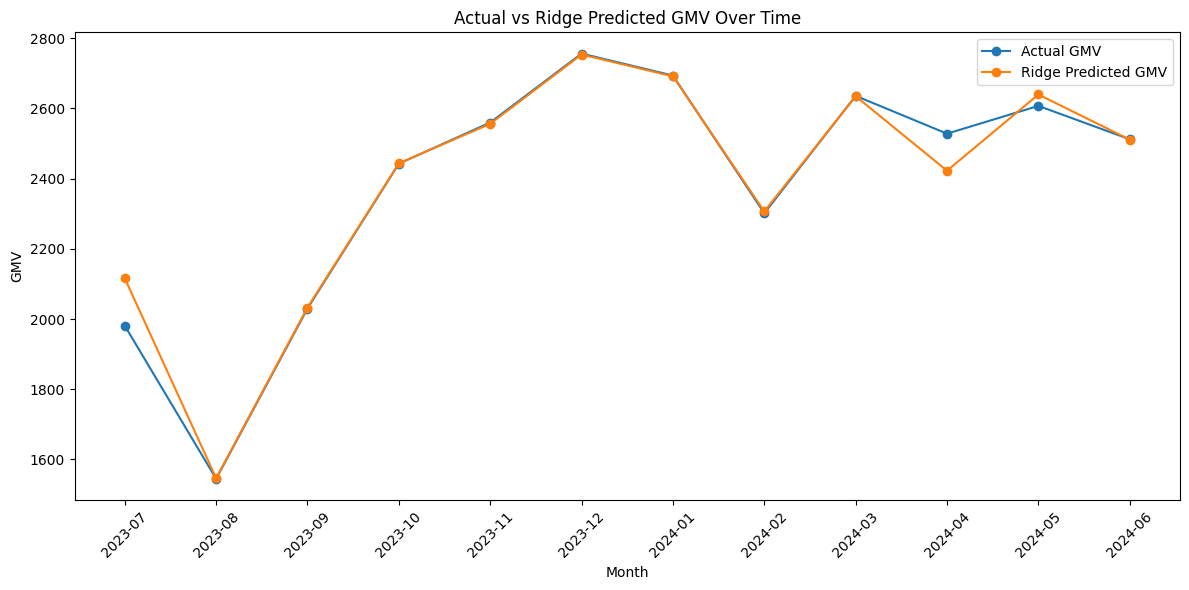

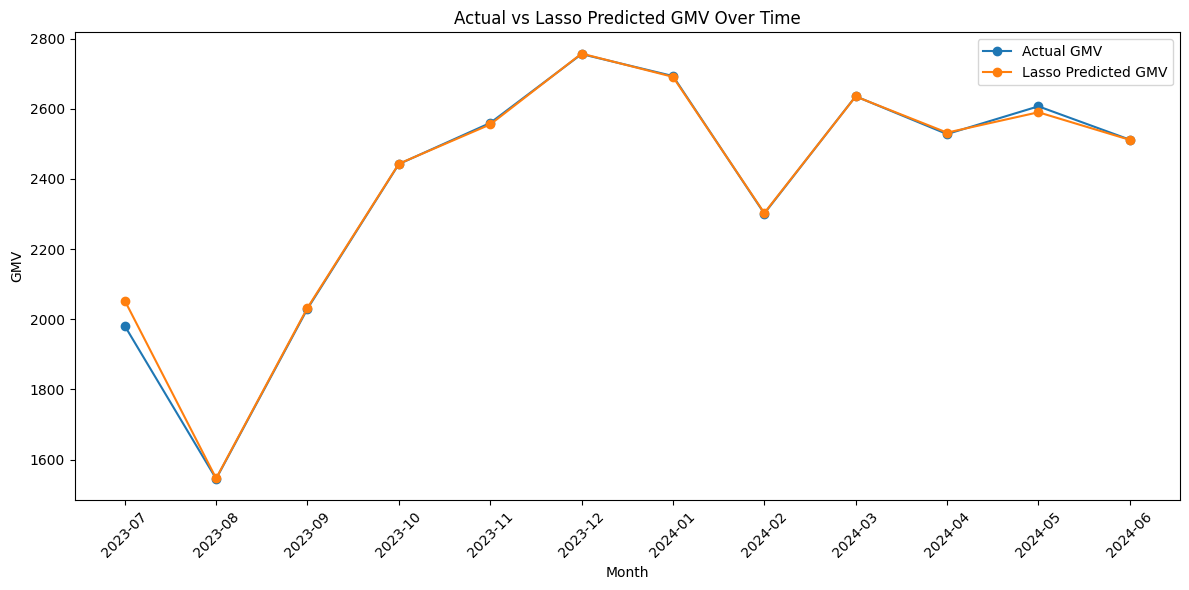

In [131]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Prepare the data
df_clean = df.dropna()
X = df_clean.drop(['gmv', 'Month_Year', 'order_date_only'], axis=1)
y = df_clean['gmv']

# Convert categorical columns to numeric
for column in X.select_dtypes(include=['object']).columns:
    X[column] = LabelEncoder().fit_transform(X[column])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 1. Linear Regression
print("Fitting Linear Regression model...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print("\nModel Performance:")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Testing R² Score: {test_r2:.4f}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")
print(f"Training MAE: {train_mae:.4f}")
print(f"Testing MAE: {test_mae:.4f}")

# Get feature coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})
coefficients['Abs_Coefficient'] = abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)

print("\nTop 15 most important features:")
print(coefficients.head(15))

# Plot actual vs predicted values
plt.figure(figsize=(12, 5))

# Training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual GMV')
plt.ylabel('Predicted GMV')
plt.title('Training: Actual vs Predicted GMV')

# Testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual GMV')
plt.ylabel('Predicted GMV')
plt.title('Testing: Actual vs Predicted GMV')

plt.tight_layout()
plt.show()

# Plot residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

plt.figure(figsize=(12, 5))

# Training residuals
plt.subplot(1, 2, 1)
plt.scatter(y_pred_train, residuals_train, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted GMV')
plt.ylabel('Residuals')
plt.title('Training: Residual Plot')

# Testing residuals
plt.subplot(1, 2, 2)
plt.scatter(y_pred_test, residuals_test, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted GMV')
plt.ylabel('Residuals')
plt.title('Testing: Residual Plot')

plt.tight_layout()
plt.show()

# Plot feature coefficients
plt.figure(figsize=(12, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=coefficients.head(15))
plt.title('Top 15 Feature Coefficients (Absolute Value)')
plt.tight_layout()
plt.show()

# Cross-validation scores
cv_scores = cross_val_score(lr_model, X_scaled, y, cv=5, scoring='r2')
print("\nCross-validation scores:")
print(f"Mean R² Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Try Ridge and Lasso regression for comparison
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)

# Fit models
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Calculate R² scores
ridge_train_r2 = r2_score(y_train, ridge.predict(X_train))
ridge_test_r2 = r2_score(y_test, ridge.predict(X_test))
lasso_train_r2 = r2_score(y_train, lasso.predict(X_train))
lasso_test_r2 = r2_score(y_test, lasso.predict(X_test))

print("\nRegularized Models Performance:")
print(f"Ridge - Training R²: {ridge_train_r2:.4f}, Testing R²: {ridge_test_r2:.4f}")
print(f"Lasso - Training R²: {lasso_train_r2:.4f}, Testing R²: {lasso_test_r2:.4f}")

# Create monthly predictions
monthly_predictions = pd.DataFrame({
    'Month': df_clean['Month_Year'],
    'Actual_GMV': y,
    'Predicted_GMV': lr_model.predict(X_scaled)
})

# Plot monthly trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_predictions['Month'], monthly_predictions['Actual_GMV'], label='Actual GMV', marker='o')
plt.plot(monthly_predictions['Month'], monthly_predictions['Predicted_GMV'], label='Predicted GMV', marker='o')
plt.xlabel('Month')
plt.ylabel('GMV')
plt.title('Actual vs Predicted GMV Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
# Plot monthly predictions for Ridge and Lasso
monthly_predictions['Ridge_Predicted_GMV'] = ridge.predict(X_scaled)
monthly_predictions['Lasso_Predicted_GMV'] = lasso.predict(X_scaled)

# Plot Ridge predictions
plt.figure(figsize=(12, 6))
plt.plot(monthly_predictions['Month'], monthly_predictions['Actual_GMV'], label='Actual GMV', marker='o')
plt.plot(monthly_predictions['Month'], monthly_predictions['Ridge_Predicted_GMV'], label='Ridge Predicted GMV', marker='o')
plt.xlabel('Month')
plt.ylabel('GMV')
plt.title('Actual vs Ridge Predicted GMV Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Lasso predictions
plt.figure(figsize=(12, 6))
plt.plot(monthly_predictions['Month'], monthly_predictions['Actual_GMV'], label='Actual GMV', marker='o')
plt.plot(monthly_predictions['Month'], monthly_predictions['Lasso_Predicted_GMV'], label='Lasso Predicted GMV', marker='o')
plt.xlabel('Month')
plt.ylabel('GMV')
plt.title('Actual vs Lasso Predicted GMV Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


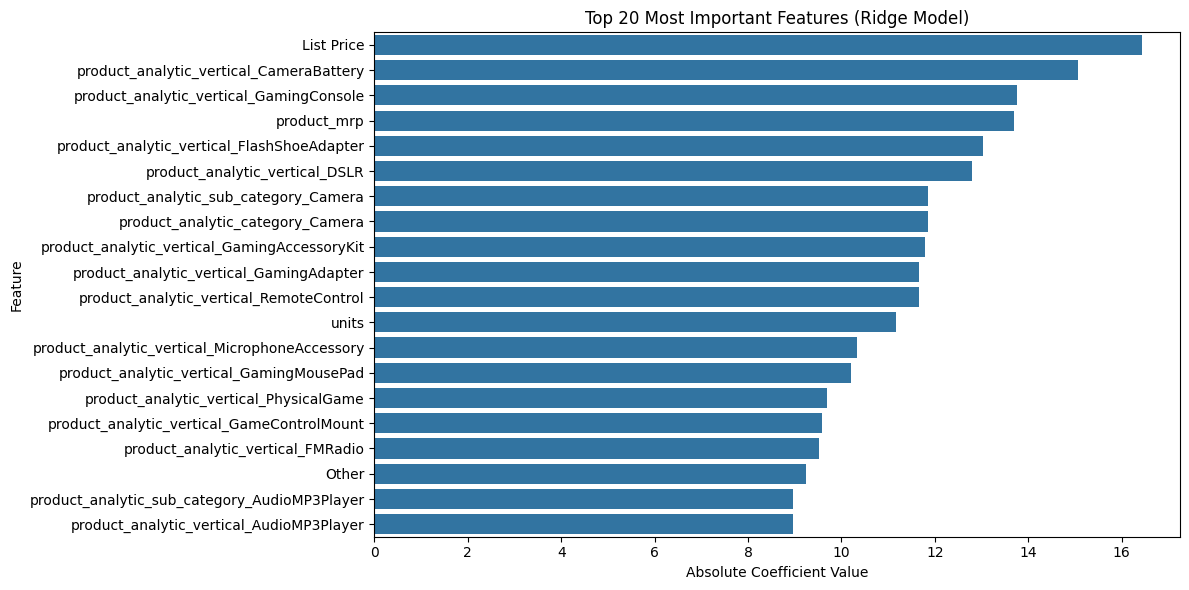

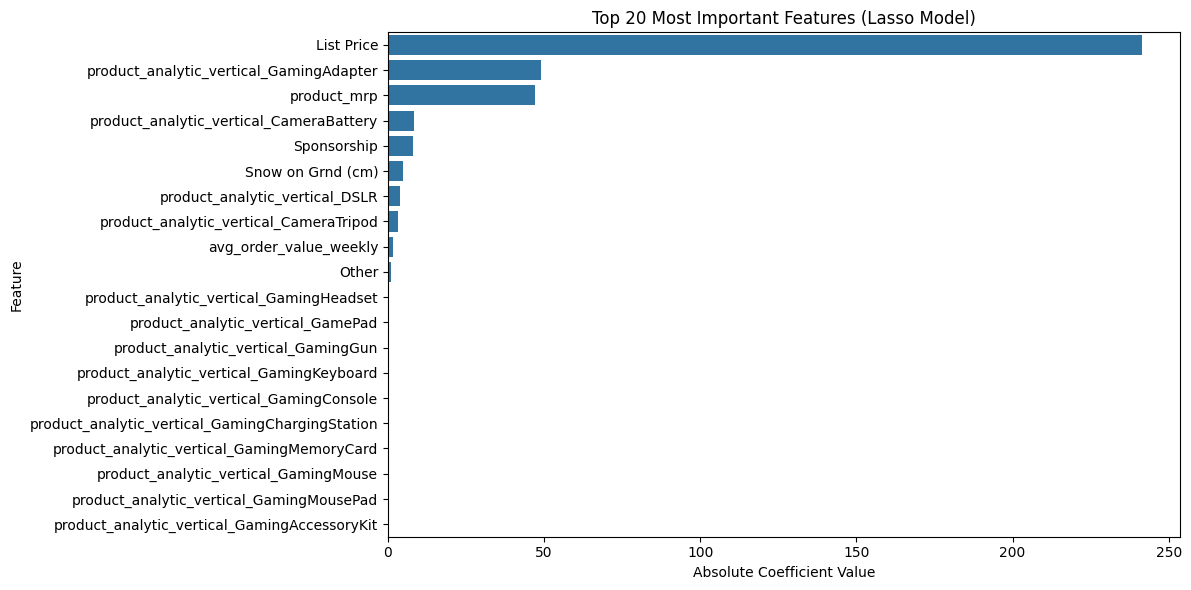


Ridge Model - Top 20 Most Important Features:
                                           Feature  Ridge_Importance
26                                      List Price         16.429620
65         product_analytic_vertical_CameraBattery         15.076329
94         product_analytic_vertical_GamingConsole         13.762743
3                                      product_mrp         13.700243
87      product_analytic_vertical_FlashShoeAdapter         13.027831
80                  product_analytic_vertical_DSLR         12.801926
42            product_analytic_sub_category_Camera         11.857101
53                product_analytic_category_Camera         11.857101
91    product_analytic_vertical_GamingAccessoryKit         11.791083
92         product_analytic_vertical_GamingAdapter         11.669279
118        product_analytic_vertical_RemoteControl         11.653880
1                                            units         11.177101
112  product_analytic_vertical_MicrophoneAccessory      

In [132]:
# Get feature importance values for each model
ridge_importance = pd.DataFrame({
    'Feature': X.columns,
    'Ridge_Importance': abs(ridge.coef_)
}).sort_values('Ridge_Importance', ascending=False)

lasso_importance = pd.DataFrame({
    'Feature': X.columns, 
    'Lasso_Importance': abs(lasso.coef_)
}).sort_values('Lasso_Importance', ascending=False)

# Plot top 20 most important features for Ridge
plt.figure(figsize=(12, 6))
sns.barplot(data=ridge_importance.head(20), x='Ridge_Importance', y='Feature')
plt.title('Top 20 Most Important Features (Ridge Model)')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

# Plot top 20 most important features for Lasso  
plt.figure(figsize=(12, 6))
sns.barplot(data=lasso_importance.head(20), x='Lasso_Importance', y='Feature')
plt.title('Top 20 Most Important Features (Lasso Model)')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

# Print feature importance tables
print("\nRidge Model - Top 20 Most Important Features:")
print(ridge_importance.head(20))
print("\nLasso Model - Top 20 Most Important Features:") 
print(lasso_importance.head(20))


Calculating permutation importance...

Top 15 features by permutation importance:
                                           Feature  Importance_Mean  \
94         product_analytic_vertical_GamingConsole         0.033829   
26                                      List Price         0.031359   
80                  product_analytic_vertical_DSLR         0.030317   
78            product_analytic_vertical_CoolingPad         0.027659   
118        product_analytic_vertical_RemoteControl         0.026740   
48     product_analytic_sub_category_GamingConsole         0.023578   
100       product_analytic_vertical_GamingMousePad         0.021754   
82        product_analytic_vertical_DockingStation         0.021047   
84               product_analytic_vertical_FMRadio         0.020795   
3                                      product_mrp         0.019073   
15                                              TV         0.018662   
9                               Cool Deg Days (°C)         0.01784

C:\Users\KRITYAPRIYA\AppData\Local\Temp\ipykernel_24108\4120940447.py:57: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




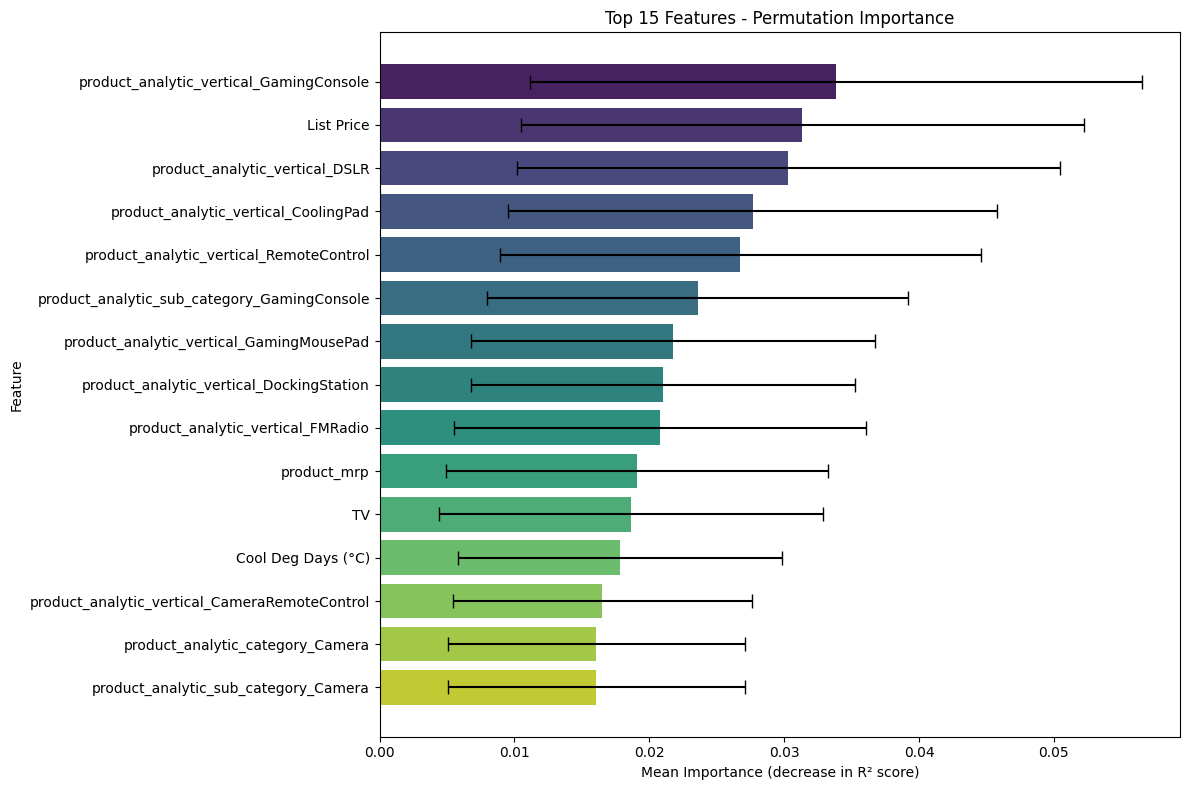

C:\Users\KRITYAPRIYA\AppData\Local\Temp\ipykernel_24108\4120940447.py:94: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\KRITYAPRIYA\AppData\Local\Temp\ipykernel_24108\4120940447.py:105: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




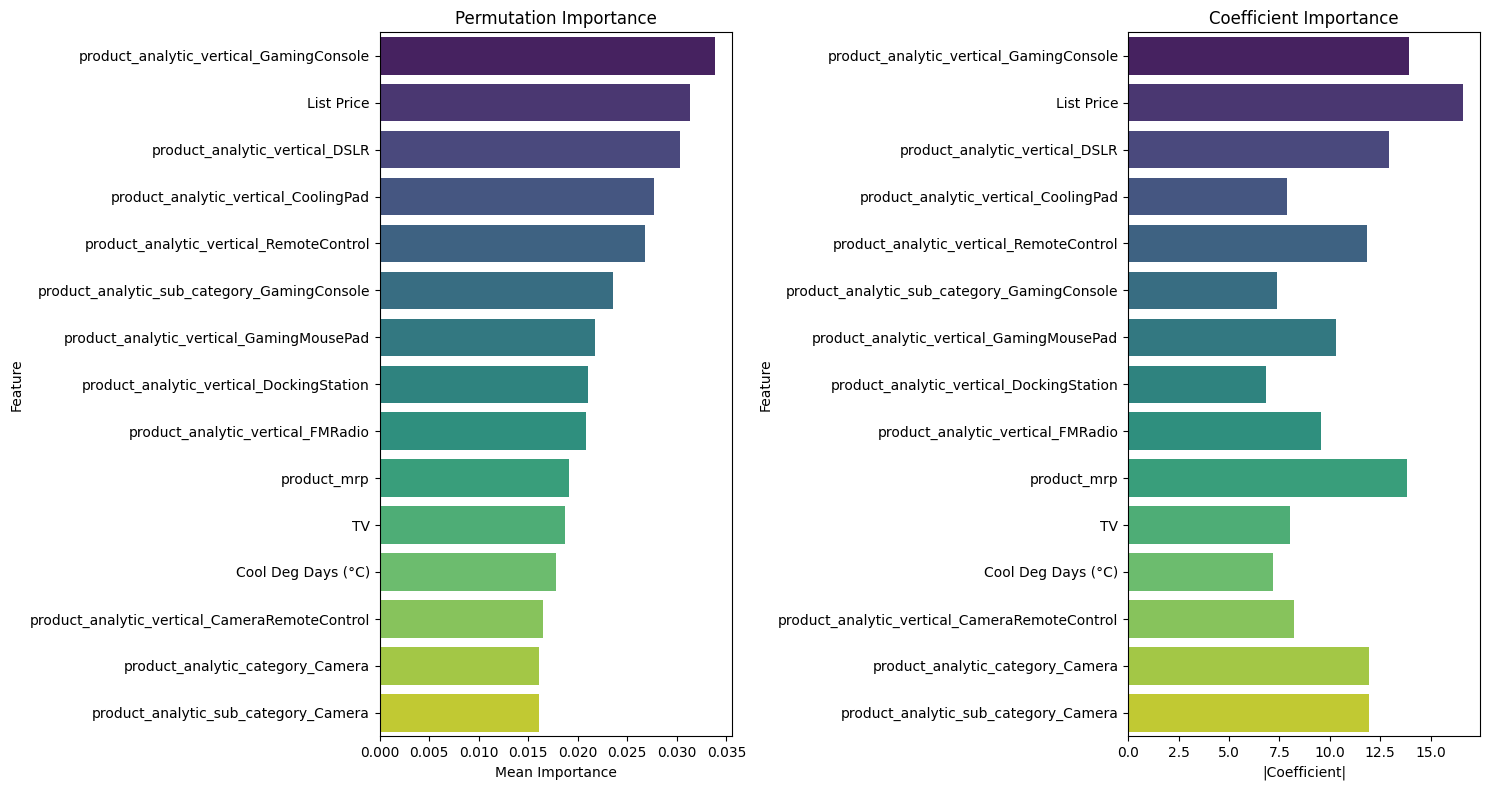


Correlation between permutation importance and coefficient magnitude: 0.319753428211865

Features important in both methods:
- product_analytic_vertical_RemoteControl
  Permutation rank: 119, Coefficient rank: 119
- product_analytic_vertical_DSLR
  Permutation rank: 81, Coefficient rank: 81
- product_analytic_sub_category_Camera
  Permutation rank: 43, Coefficient rank: 43
- product_analytic_vertical_GamingConsole
  Permutation rank: 95, Coefficient rank: 95
- product_mrp
  Permutation rank: 4, Coefficient rank: 4
- product_analytic_vertical_GamingMousePad
  Permutation rank: 101, Coefficient rank: 101
- List Price
  Permutation rank: 27, Coefficient rank: 27
- product_analytic_category_Camera
  Permutation rank: 54, Coefficient rank: 54

Feature importance stability (standard deviation / mean):
                                           Feature  Stability
121              product_analytic_vertical_Softbox -18.355064
22                                           Radio -17.906323
23    

C:\Users\KRITYAPRIYA\AppData\Local\Temp\ipykernel_24108\4120940447.py:149: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




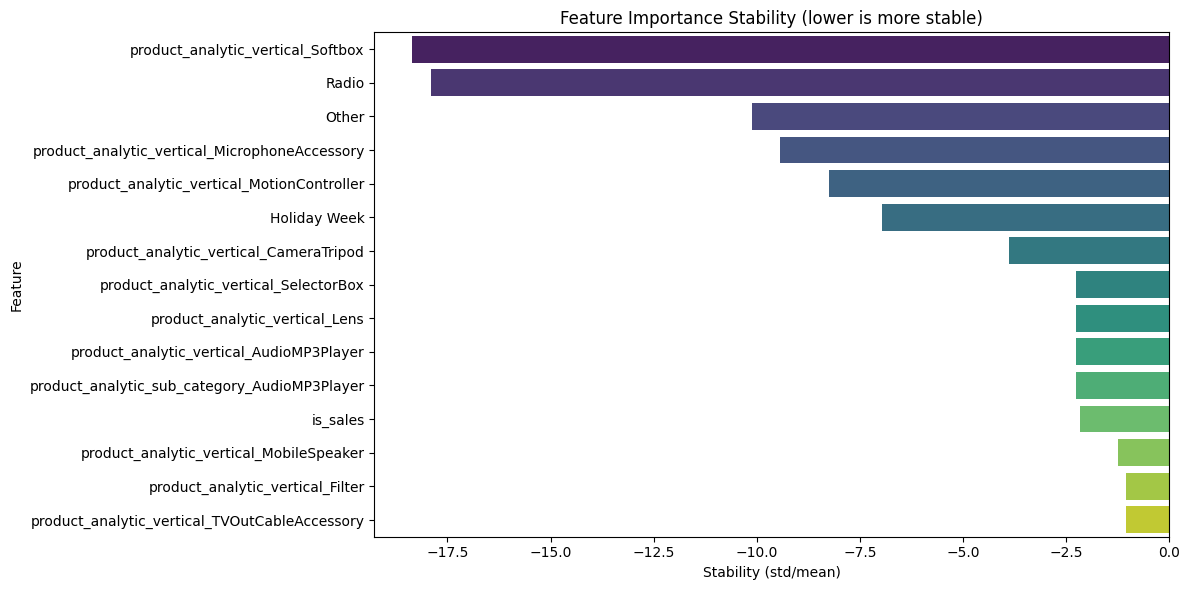

In [133]:
# Import necessary libraries
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Prepare the data
df_clean = df.dropna()
X = df_clean.drop(['gmv', 'Month_Year', 'order_date_only'], axis=1)
y = df_clean['gmv']

# Convert categorical columns to numeric
for column in X.select_dtypes(include=['object']).columns:
    X[column] = LabelEncoder().fit_transform(X[column])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Calculate permutation importance
print("Calculating permutation importance...")
result = permutation_importance(
    lr_model, X_test, y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# Create DataFrame with permutation importance results
perm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance_Mean': result.importances_mean,
    'Importance_Std': result.importances_std
})

# Sort by importance
perm_importance_df = perm_importance_df.sort_values('Importance_Mean', ascending=False)

# Print top 15 features
print("\nTop 15 features by permutation importance:")
print(perm_importance_df.head(15))

# Plot permutation importance
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Importance_Mean',
    y='Feature',
    data=perm_importance_df.head(15),
    palette='viridis'
)
plt.errorbar(
    x=perm_importance_df.head(15)['Importance_Mean'],
    y=range(15),
    xerr=perm_importance_df.head(15)['Importance_Std'],
    fmt='none',
    color='black',
    capsize=5
)
plt.title('Top 15 Features - Permutation Importance')
plt.xlabel('Mean Importance (decrease in R² score)')
plt.tight_layout()
plt.show()

# Compare with coefficient importance
coef_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': abs(lr_model.coef_)
})
coef_importance_df = coef_importance_df.sort_values('Coefficient', ascending=False)

# Merge permutation and coefficient importance
comparison_df = pd.merge(
    perm_importance_df,
    coef_importance_df,
    on='Feature'
).sort_values('Importance_Mean', ascending=False)

# Plot comparison of top 15 features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Permutation importance plot
sns.barplot(
    x='Importance_Mean',
    y='Feature',
    data=comparison_df.head(15),
    ax=ax1,
    palette='viridis'
)
ax1.set_title('Permutation Importance')
ax1.set_xlabel('Mean Importance')

# Coefficient importance plot
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=comparison_df.head(15),
    ax=ax2,
    palette='viridis'
)
ax2.set_title('Coefficient Importance')
ax2.set_xlabel('|Coefficient|')

plt.tight_layout()
plt.show()

# Calculate correlation between importance measures
correlation = np.corrcoef(
    comparison_df['Importance_Mean'],
    comparison_df['Coefficient']
)[0, 1]

print("\nCorrelation between permutation importance and coefficient magnitude:", correlation)

# Print features that appear in top 15 for both methods
perm_top15 = set(perm_importance_df.head(15)['Feature'])
coef_top15 = set(coef_importance_df.head(15)['Feature'])
common_features = perm_top15.intersection(coef_top15)

print("\nFeatures important in both methods:")
for feature in common_features:
    perm_rank = perm_importance_df[perm_importance_df['Feature'] == feature].index[0] + 1
    coef_rank = coef_importance_df[coef_importance_df['Feature'] == feature].index[0] + 1
    print(f"- {feature}")
    print(f"  Permutation rank: {perm_rank}, Coefficient rank: {coef_rank}")

# Calculate stability of permutation importance
print("\nFeature importance stability (standard deviation / mean):")
stability_df = pd.DataFrame({
    'Feature': perm_importance_df['Feature'],
    'Stability': perm_importance_df['Importance_Std'] / perm_importance_df['Importance_Mean']
})
stability_df = stability_df.sort_values('Stability')
print(stability_df.head(15))

# Plot feature importance stability
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Stability',
    y='Feature',
    data=stability_df.head(15),
    palette='viridis'
)
plt.title('Feature Importance Stability (lower is more stable)')
plt.xlabel('Stability (std/mean)')
plt.tight_layout()
plt.show()

C:\Users\KRITYAPRIYA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.976e+02, tolerance: 1.184e+02



Calculating permutation importance for Ridge model...
Calculating permutation importance for Lasso model...

Top 15 features by Ridge permutation importance:
                                           Feature  Ridge_Importance_Mean  \
94         product_analytic_vertical_GamingConsole               0.033820   
26                                      List Price               0.031315   
80                  product_analytic_vertical_DSLR               0.030303   
78            product_analytic_vertical_CoolingPad               0.027322   
118        product_analytic_vertical_RemoteControl               0.026609   
48     product_analytic_sub_category_GamingConsole               0.023565   
100       product_analytic_vertical_GamingMousePad               0.021801   
84               product_analytic_vertical_FMRadio               0.021032   
82        product_analytic_vertical_DockingStation               0.020992   
3                                      product_mrp               0.01917

C:\Users\KRITYAPRIYA\AppData\Local\Temp\ipykernel_24108\1175740893.py:83: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\KRITYAPRIYA\AppData\Local\Temp\ipykernel_24108\1175740893.py:102: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




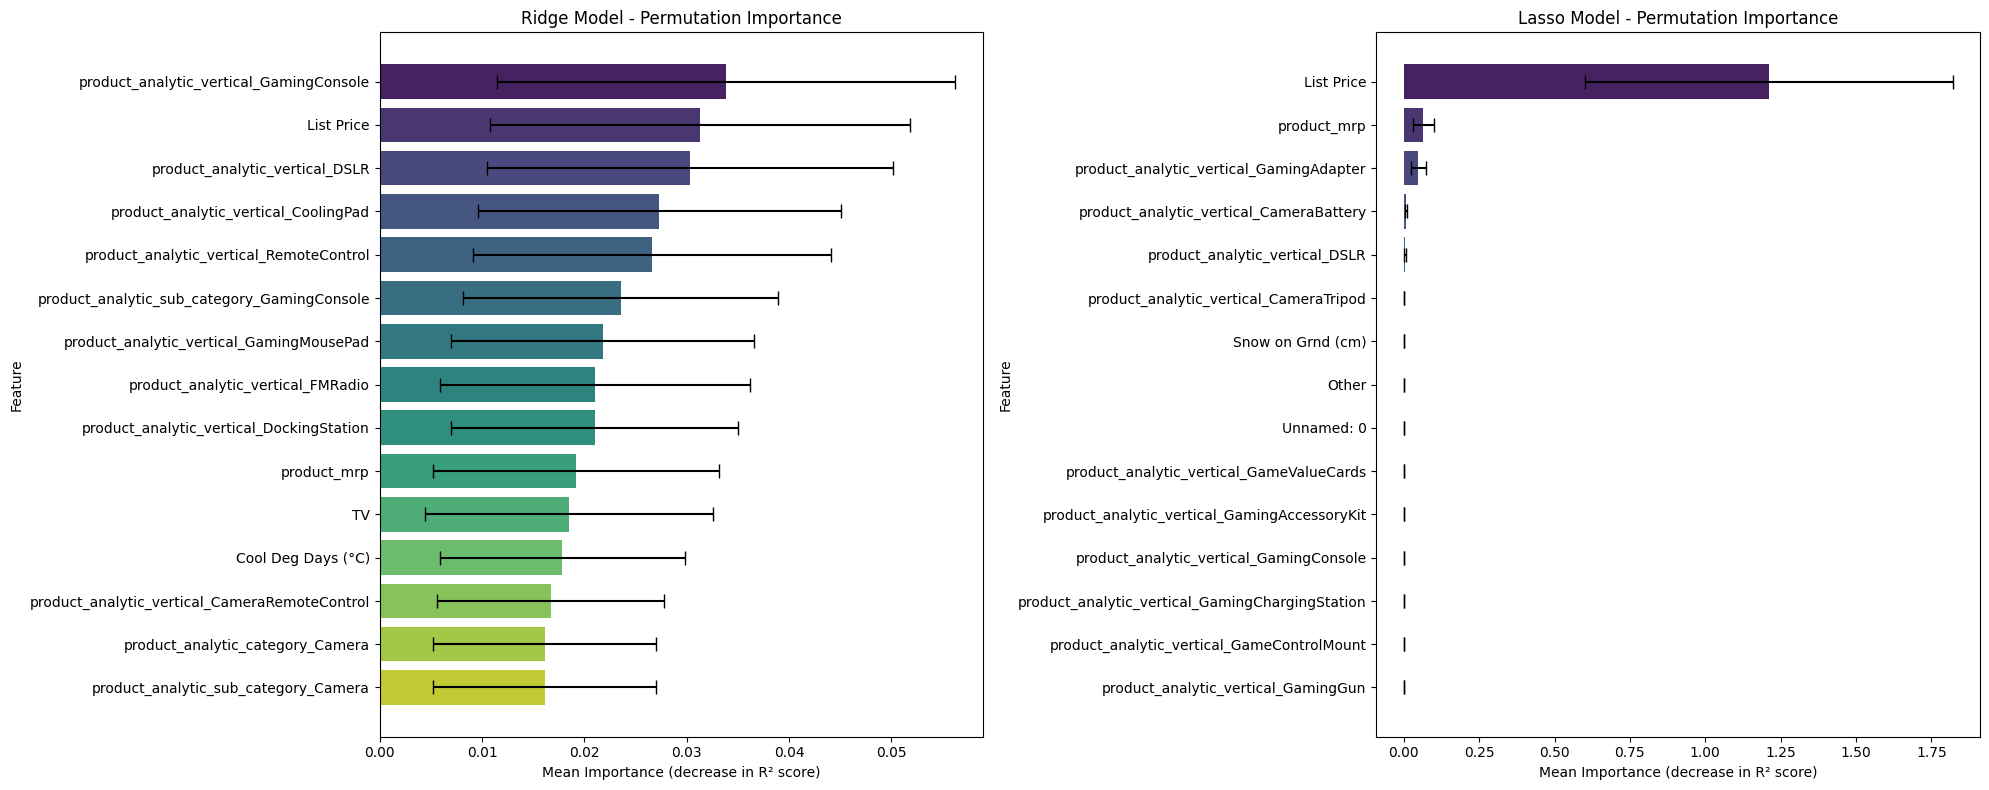


Features important in both Ridge and Lasso models:
- product_analytic_vertical_GamingConsole
  Ridge rank: 95, Lasso rank: 95
- List Price
  Ridge rank: 27, Lasso rank: 27
- product_analytic_vertical_DSLR
  Ridge rank: 81, Lasso rank: 81
- product_mrp
  Ridge rank: 4, Lasso rank: 4

Most stable important features (lowest std/mean ratio):

Ridge model:
                                           Feature  Ridge_Stability  \
22                                           Radio       -27.479601   
121              product_analytic_vertical_Softbox       -12.830912   
23                                           Other       -12.737022   
112  product_analytic_vertical_MicrophoneAccessory       -11.591875   
114     product_analytic_vertical_MotionController        -9.918129   
31                                    Holiday Week        -8.067319   
76          product_analytic_vertical_CameraTripod        -4.195668   
41    product_analytic_sub_category_AudioMP3Player        -2.346478   
59    

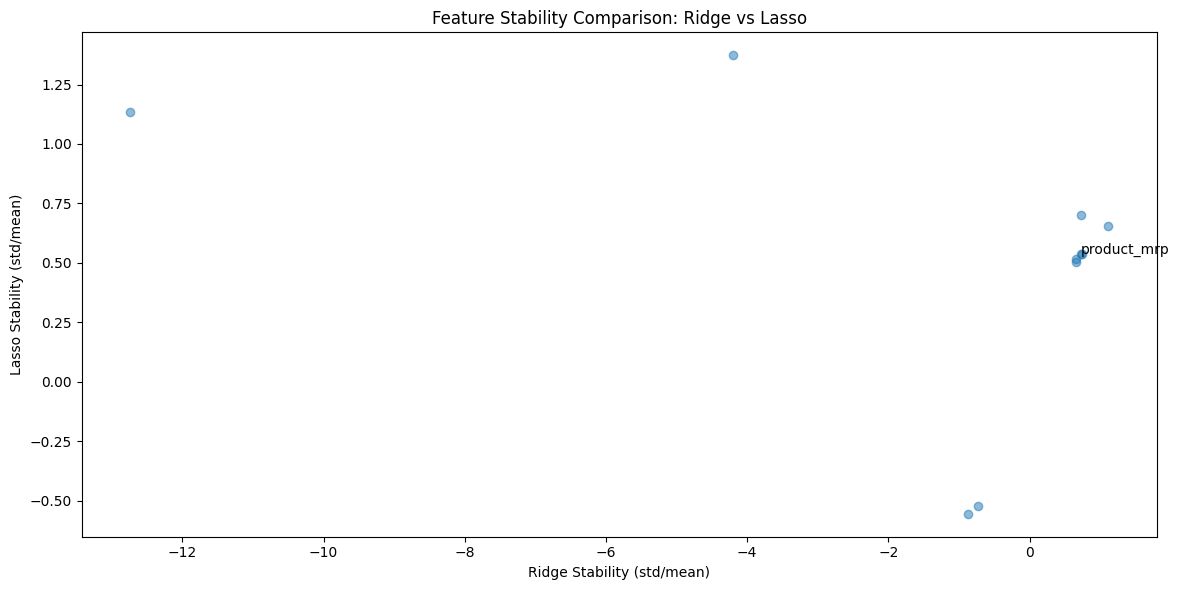


Model Performance:
Ridge R² Score: 0.8692
Lasso R² Score: 0.9764

Feature Selection Summary:
Ridge model uses 133 features
Lasso model uses 10 features


In [134]:
# Import necessary libraries
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Prepare the data
df_clean = df.dropna()
X = df_clean.drop(['gmv', 'Month_Year', 'order_date_only'], axis=1)
y = df_clean['gmv']

# Convert categorical columns to numeric
for column in X.select_dtypes(include=['object']).columns:
    X[column] = LabelEncoder().fit_transform(X[column])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and fit Ridge and Lasso models
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)

ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Calculate permutation importance for Ridge
print("Calculating permutation importance for Ridge model...")
ridge_result = permutation_importance(
    ridge_model, X_test, y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# Calculate permutation importance for Lasso
print("Calculating permutation importance for Lasso model...")
lasso_result = permutation_importance(
    lasso_model, X_test, y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# Create DataFrames for both models
ridge_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Ridge_Importance_Mean': ridge_result.importances_mean,
    'Ridge_Importance_Std': ridge_result.importances_std,
    'Ridge_Coefficient': ridge_model.coef_
})

lasso_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Lasso_Importance_Mean': lasso_result.importances_mean,
    'Lasso_Importance_Std': lasso_result.importances_std,
    'Lasso_Coefficient': lasso_model.coef_
})

# Sort by importance
ridge_importance_df = ridge_importance_df.sort_values('Ridge_Importance_Mean', ascending=False)
lasso_importance_df = lasso_importance_df.sort_values('Lasso_Importance_Mean', ascending=False)

# Print top 15 features for both models
print("\nTop 15 features by Ridge permutation importance:")
print(ridge_importance_df[['Feature', 'Ridge_Importance_Mean', 'Ridge_Coefficient']].head(15))

print("\nTop 15 features by Lasso permutation importance:")
print(lasso_importance_df[['Feature', 'Lasso_Importance_Mean', 'Lasso_Coefficient']].head(15))

# Create visualization comparing both models
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Ridge importance plot
sns.barplot(
    x='Ridge_Importance_Mean',
    y='Feature',
    data=ridge_importance_df.head(15),
    ax=ax1,
    palette='viridis'
)
ax1.errorbar(
    x=ridge_importance_df.head(15)['Ridge_Importance_Mean'],
    y=range(15),
    xerr=ridge_importance_df.head(15)['Ridge_Importance_Std'],
    fmt='none',
    color='black',
    capsize=5
)
ax1.set_title('Ridge Model - Permutation Importance')
ax1.set_xlabel('Mean Importance (decrease in R² score)')

# Lasso importance plot
sns.barplot(
    x='Lasso_Importance_Mean',
    y='Feature',
    data=lasso_importance_df.head(15),
    ax=ax2,
    palette='viridis'
)
ax2.errorbar(
    x=lasso_importance_df.head(15)['Lasso_Importance_Mean'],
    y=range(15),
    xerr=lasso_importance_df.head(15)['Lasso_Importance_Std'],
    fmt='none',
    color='black',
    capsize=5
)
ax2.set_title('Lasso Model - Permutation Importance')
ax2.set_xlabel('Mean Importance (decrease in R² score)')

plt.tight_layout()
plt.show()

# Compare feature rankings between models
common_features = pd.merge(
    ridge_importance_df[['Feature', 'Ridge_Importance_Mean']].head(15),
    lasso_importance_df[['Feature', 'Lasso_Importance_Mean']].head(15),
    on='Feature',
    how='inner'
)

print("\nFeatures important in both Ridge and Lasso models:")
for _, row in common_features.iterrows():
    ridge_rank = ridge_importance_df[ridge_importance_df['Feature'] == row['Feature']].index[0] + 1
    lasso_rank = lasso_importance_df[lasso_importance_df['Feature'] == row['Feature']].index[0] + 1
    print(f"- {row['Feature']}")
    print(f"  Ridge rank: {ridge_rank}, Lasso rank: {lasso_rank}")

# Calculate stability metrics
ridge_stability = ridge_importance_df['Ridge_Importance_Std'] / ridge_importance_df['Ridge_Importance_Mean']
lasso_stability = lasso_importance_df['Lasso_Importance_Std'] / lasso_importance_df['Lasso_Importance_Mean']

stability_df = pd.DataFrame({
    'Feature': X.columns,
    'Ridge_Stability': ridge_stability,
    'Lasso_Stability': lasso_stability
})

print("\nMost stable important features (lowest std/mean ratio):")
print("\nRidge model:")
print(stability_df.sort_values('Ridge_Stability').head(10))
print("\nLasso model:")
print(stability_df.sort_values('Lasso_Stability').head(10))

# Plot stability comparison
plt.figure(figsize=(12, 6))
plt.scatter(stability_df['Ridge_Stability'], stability_df['Lasso_Stability'], alpha=0.5)
plt.xlabel('Ridge Stability (std/mean)')
plt.ylabel('Lasso Stability (std/mean)')
plt.title('Feature Stability Comparison: Ridge vs Lasso')

# Add feature labels for most important features
for idx, row in stability_df.head(10).iterrows():
    plt.annotate(row['Feature'], 
                (row['Ridge_Stability'], row['Lasso_Stability']))

plt.tight_layout()
plt.show()

# Print model performance metrics
ridge_score = ridge_model.score(X_test, y_test)
lasso_score = lasso_model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Ridge R² Score: {ridge_score:.4f}")
print(f"Lasso R² Score: {lasso_score:.4f}")

# Count non-zero coefficients
ridge_nonzero = np.sum(ridge_model.coef_ != 0)
lasso_nonzero = np.sum(lasso_model.coef_ != 0)

print("\nFeature Selection Summary:")
print(f"Ridge model uses {ridge_nonzero} features")
print(f"Lasso model uses {lasso_nonzero} features"
)

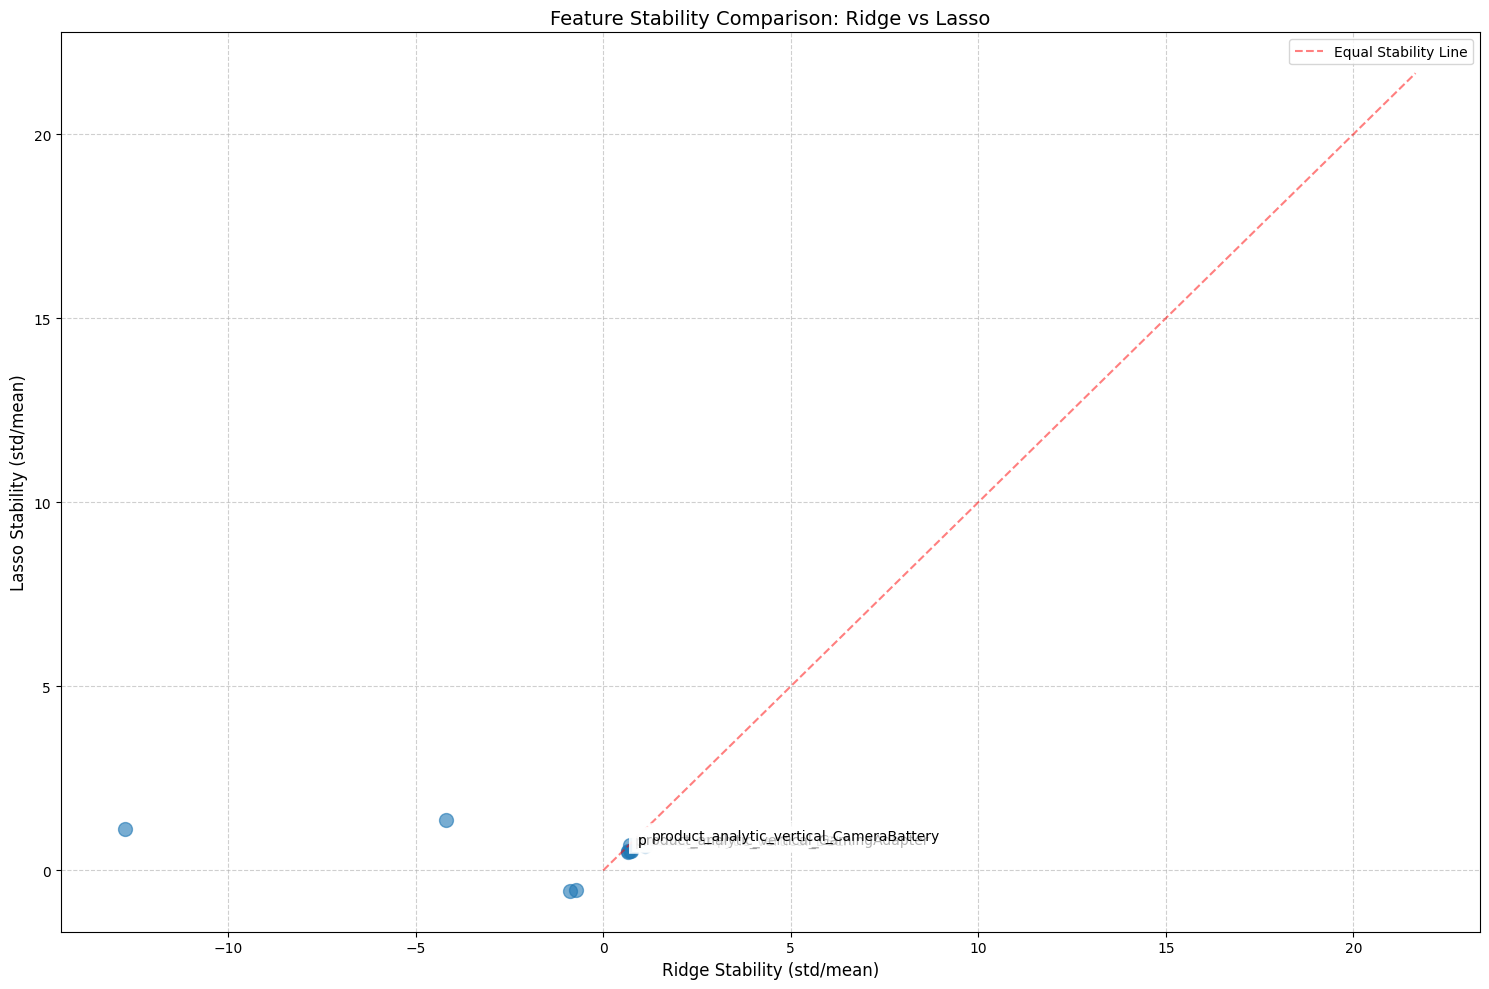


Stability Statistics:

Most stable features in Ridge model:
                                           Feature  Ridge_Stability
22                                           Radio       -27.479601
121              product_analytic_vertical_Softbox       -12.830912
23                                           Other       -12.737022
112  product_analytic_vertical_MicrophoneAccessory       -11.591875
114     product_analytic_vertical_MotionController        -9.918129
31                                    Holiday Week        -8.067319
76          product_analytic_vertical_CameraTripod        -4.195668
41    product_analytic_sub_category_AudioMP3Player        -2.346478
59        product_analytic_vertical_AudioMP3Player        -2.346478
30                                        is_sales        -2.228231

Most stable features in Lasso model:
                                    Feature  Lasso_Stability
17                              Sponsorship        -0.554043
33                   avg_order_

In [135]:
# Calculate stability metrics for both models
ridge_stability = ridge_importance_df['Ridge_Importance_Std'] / ridge_importance_df['Ridge_Importance_Mean']
lasso_stability = lasso_importance_df['Lasso_Importance_Std'] / lasso_importance_df['Lasso_Importance_Mean']

stability_df = pd.DataFrame({
    'Feature': X.columns,
    'Ridge_Stability': ridge_stability,
    'Lasso_Stability': lasso_stability
})

# Create feature stability comparison plot with improved visibility
plt.figure(figsize=(15, 10))
plt.scatter(
    stability_df['Ridge_Stability'], 
    stability_df['Lasso_Stability'], 
    alpha=0.6,
    s=100  # Increase marker size
)

# Add labels and title with increased font size
plt.xlabel('Ridge Stability (std/mean)', fontsize=12)
plt.ylabel('Lasso Stability (std/mean)', fontsize=12)
plt.title('Feature Stability Comparison: Ridge vs Lasso', fontsize=14)

# Add feature labels for top 10 most important features
top_features = pd.concat([
    ridge_importance_df['Feature'].head(5),
    lasso_importance_df['Feature'].head(5)
]).unique()

for feature in top_features:
    x = stability_df.loc[stability_df['Feature'] == feature, 'Ridge_Stability'].iloc[0]
    y = stability_df.loc[stability_df['Feature'] == feature, 'Lasso_Stability'].iloc[0]
    plt.annotate(
        feature, 
        (x, y),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=10,
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7)
    )

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add diagonal line for reference
max_val = max(
    stability_df['Ridge_Stability'].max(),
    stability_df['Lasso_Stability'].max()
)
plt.plot([0, max_val], [0, max_val], 'r--', alpha=0.5, label='Equal Stability Line')

# Add legend
plt.legend(fontsize=10)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print stability statistics
print("\nStability Statistics:")
print("\nMost stable features in Ridge model:")
print(stability_df.nsmallest(10, 'Ridge_Stability')[['Feature', 'Ridge_Stability']])

print("\nMost stable features in Lasso model:")
print(stability_df.nsmallest(10, 'Lasso_Stability')[['Feature', 'Lasso_Stability']])

# Calculate correlation between Ridge and Lasso stability
stability_correlation = np.corrcoef(stability_df['Ridge_Stability'], stability_df['Lasso_Stability'])[0,1]
print(f"\nCorrelation between Ridge and Lasso stability: {stability_correlation:.4f}")

Channel Importance Analysis:
             Channel  Coefficient  Importance_Mean  Importance_Std
4   Online marketing     0.001589         1.521325        0.397861
6                SEM     0.000092         0.014581        0.011016
0                 TV     0.000000         0.000000        0.000000
1            Digital     0.000000         0.000000        0.000000
2        Sponsorship     0.000000         0.000000        0.000000
3  Content Marketing     0.000000         0.000000        0.000000
5         Affiliates     0.000000         0.000000        0.000000


C:\Users\KRITYAPRIYA\AppData\Local\Temp\ipykernel_24108\3933003450.py:58: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




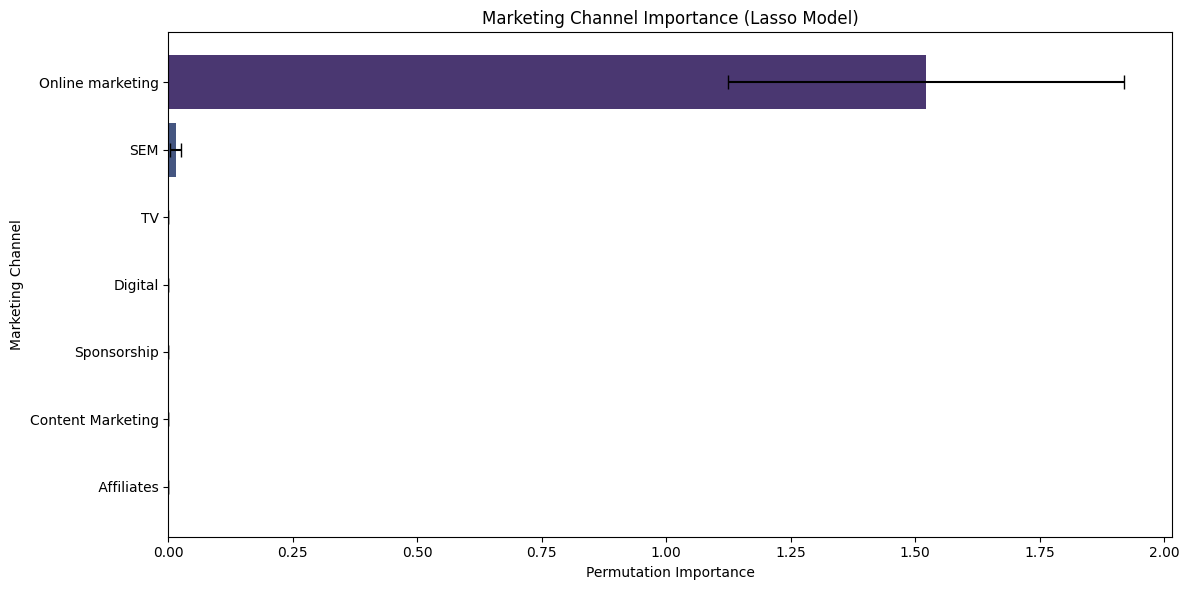

C:\Users\KRITYAPRIYA\AppData\Local\Temp\ipykernel_24108\3933003450.py:82: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




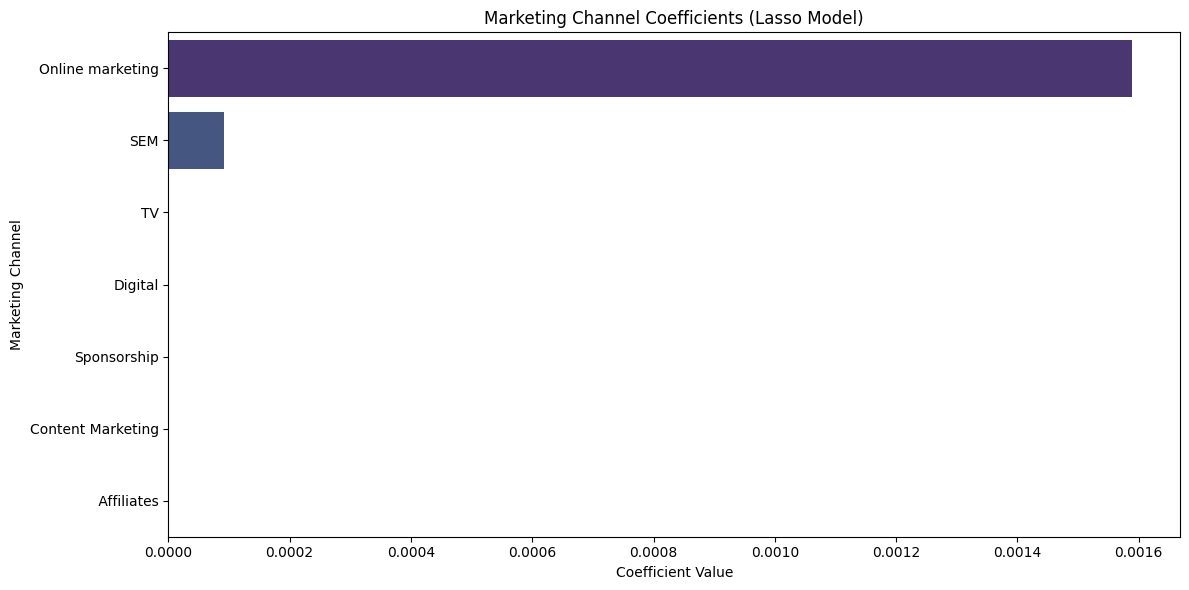

C:\Users\KRITYAPRIYA\AppData\Local\Temp\ipykernel_24108\3933003450.py:99: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




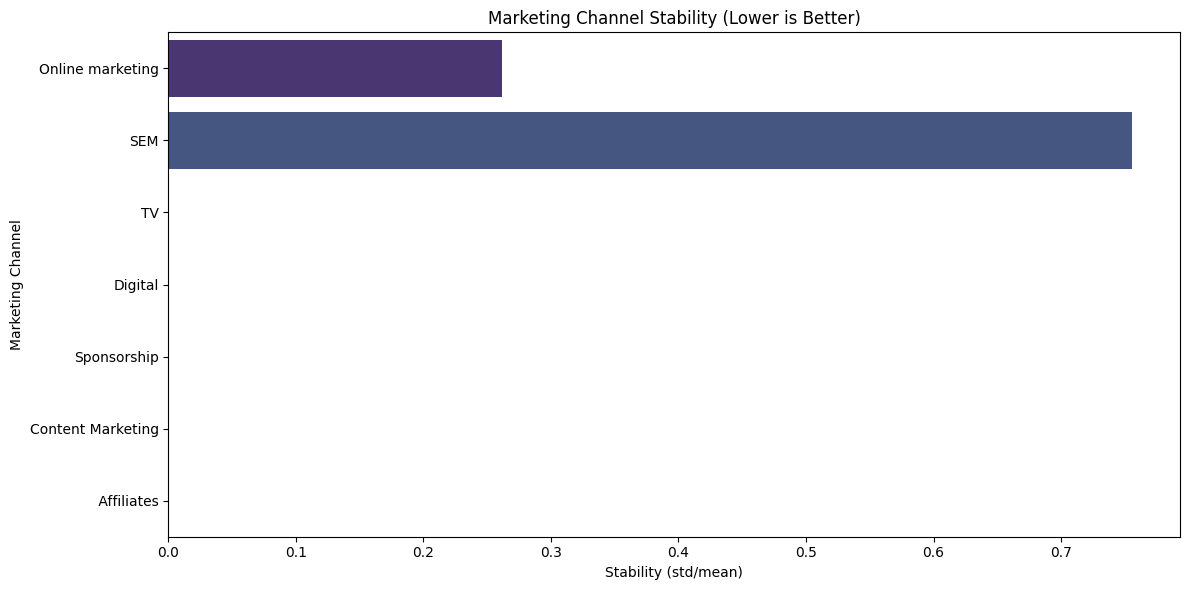


Summary Statistics:

Most Important Channels (by Permutation Importance):
            Channel  Importance_Mean
4  Online marketing         1.521325
6               SEM         0.014581
0                TV         0.000000
1           Digital         0.000000
2       Sponsorship         0.000000

Most Stable Channels (Lowest std/mean ratio):
            Channel  Stability
4  Online marketing   0.261523
6               SEM   0.755521
0                TV        NaN
1           Digital        NaN
2       Sponsorship        NaN

Non-zero Coefficients:
            Channel  Coefficient
4  Online marketing     0.001589
6               SEM     0.000092


In [136]:
# Import necessary libraries
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Define marketing channel columns (note the space before 'Affiliates')
channel_columns = [
    'TV', 
    'Digital', 
    'Sponsorship', 
    'Content Marketing', 
    'Online marketing',
    ' Affiliates',  # Note the space before 'Affiliates'
    'SEM',
]

# Prepare the data
df_clean = df.dropna()
target = df_clean['product_analytic_category_Camera']

# Initialize and fit Lasso model
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(df_clean[channel_columns], target)

# Calculate permutation importance
perm_importance = permutation_importance(
    lasso, 
    df_clean[channel_columns], 
    target,
    n_repeats=10, 
    random_state=42
)

# Create DataFrame with results
importance_df = pd.DataFrame({
    'Channel': channel_columns,
    'Coefficient': lasso.coef_,
    'Importance_Mean': perm_importance.importances_mean,
    'Importance_Std': perm_importance.importances_std
})

# Sort by importance
importance_df = importance_df.sort_values('Importance_Mean', ascending=False)

# Print results
print("Channel Importance Analysis:")
print(importance_df)

# Create visualization
plt.figure(figsize=(12, 6))

# Plot permutation importance with error bars
sns.barplot(
    x='Importance_Mean',
    y='Channel',
    data=importance_df,
    palette='viridis'
)

plt.errorbar(
    x=importance_df['Importance_Mean'],
    y=np.arange(len(importance_df)),
    xerr=importance_df['Importance_Std'],
    fmt='none',
    color='black',
    capsize=5
)

plt.title('Marketing Channel Importance (Lasso Model)')
plt.xlabel('Permutation Importance')
plt.ylabel('Marketing Channel')
plt.tight_layout()
plt.show()

# Plot coefficients
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Coefficient',
    y='Channel',
    data=importance_df,
    palette='viridis'
)
plt.title('Marketing Channel Coefficients (Lasso Model)')
plt.xlabel('Coefficient Value')
plt.ylabel('Marketing Channel')
plt.tight_layout()
plt.show()

# Calculate and plot stability
importance_df['Stability'] = importance_df['Importance_Std'] / importance_df['Importance_Mean']
importance_df = importance_df.sort_values('Stability')

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Stability',
    y='Channel',
    data=importance_df,
    palette='viridis'
)
plt.title('Marketing Channel Stability (Lower is Better)')
plt.xlabel('Stability (std/mean)')
plt.ylabel('Marketing Channel')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print("\nMost Important Channels (by Permutation Importance):")
print(importance_df.sort_values('Importance_Mean', ascending=False)[['Channel', 'Importance_Mean']].head())

print("\nMost Stable Channels (Lowest std/mean ratio):")
print(importance_df.sort_values('Stability')[['Channel', 'Stability']].head())

print("\nNon-zero Coefficients:")
print(importance_df[importance_df['Coefficient'] != 0][['Channel', 'Coefficient']])

Data shape after filling NaN values: (12, 7)

Verifying no NaN values remain:
TV                   0
Digital              0
Sponsorship          0
Content Marketing    0
Online marketing     0
 Affiliates          0
SEM                  0
dtype: int64


C:\Users\KRITYAPRIYA\AppData\Local\Temp\ipykernel_24108\3156348122.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




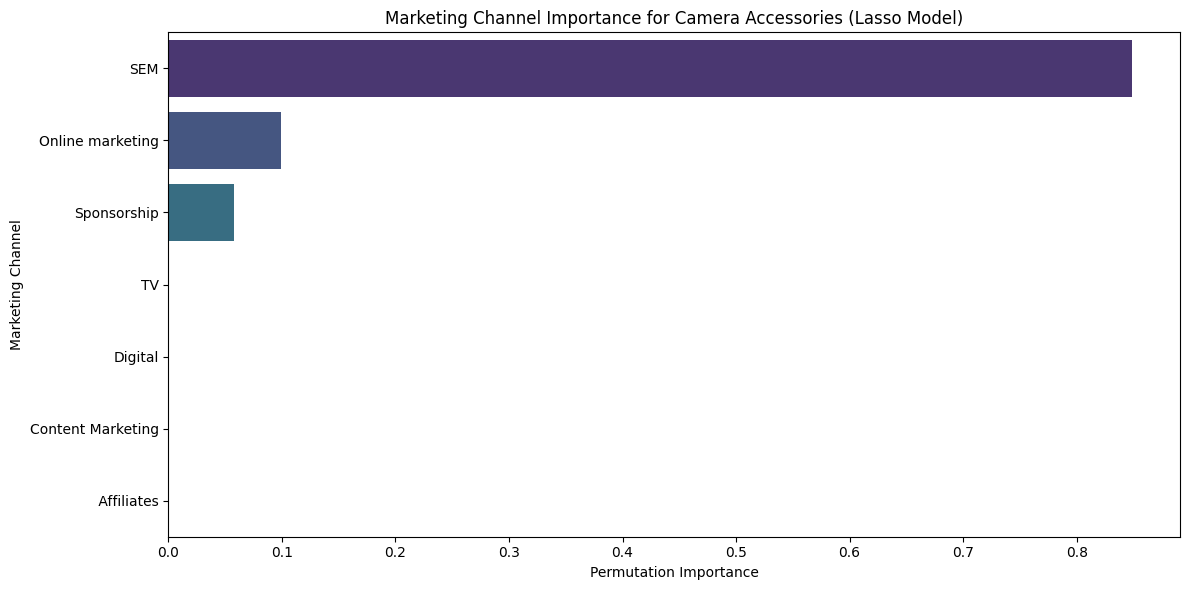

C:\Users\KRITYAPRIYA\AppData\Local\Temp\ipykernel_24108\3156348122.py:51: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




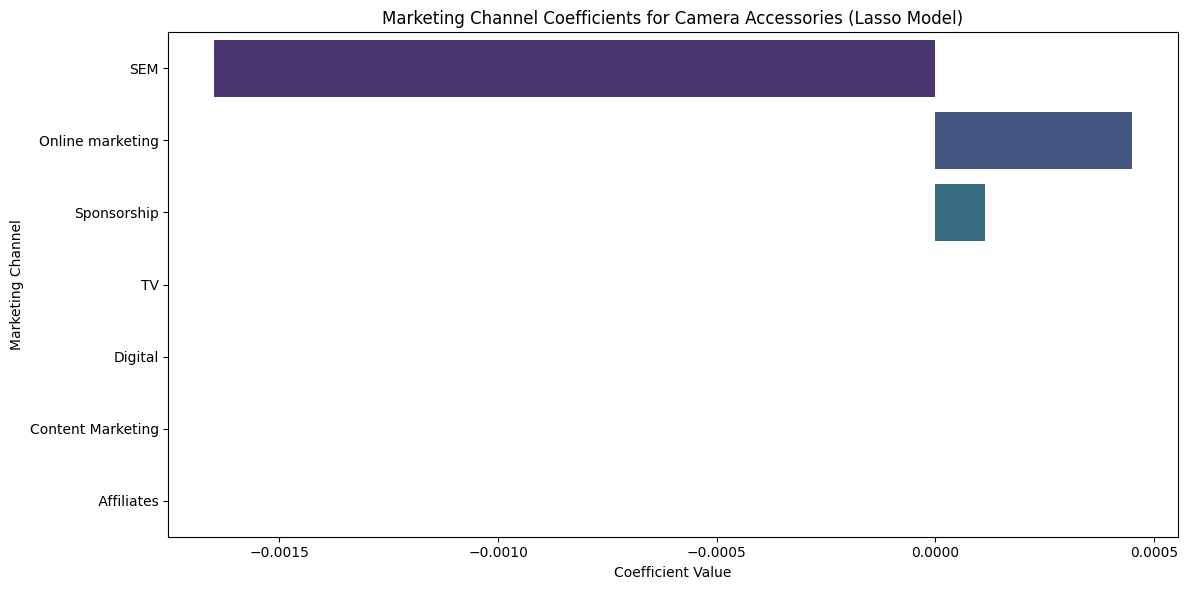

C:\Users\KRITYAPRIYA\AppData\Local\Temp\ipykernel_24108\3156348122.py:68: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




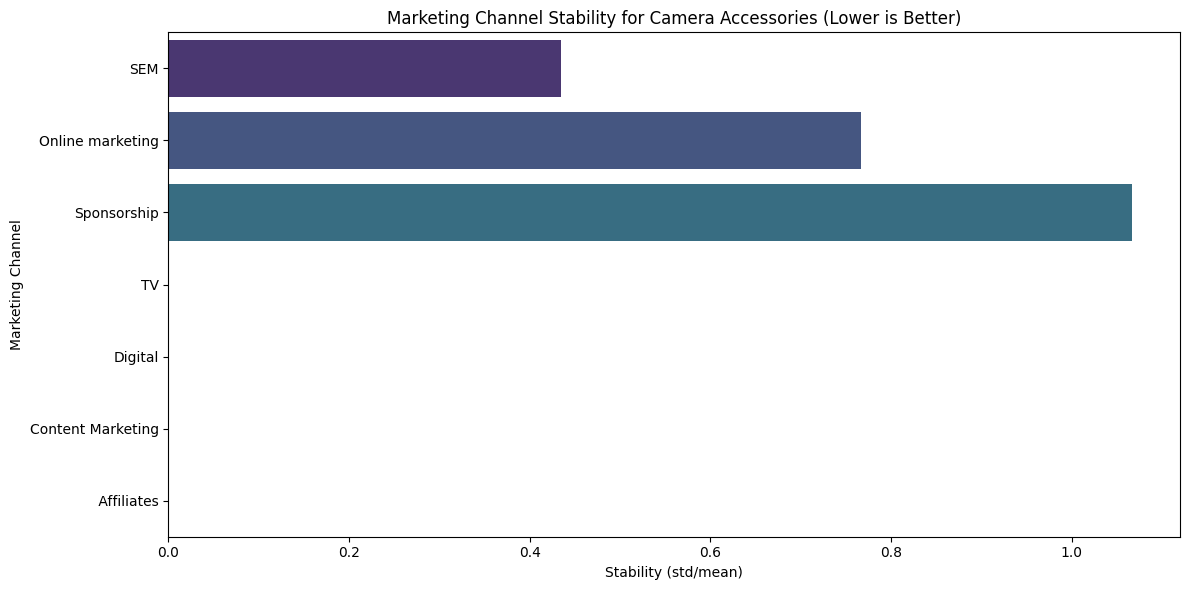


Summary Statistics for Camera Accessories:

Most Important Channels (by Permutation Importance):
            Channel  Importance_Mean
6               SEM         0.848569
4  Online marketing         0.099170
2       Sponsorship         0.057761
0                TV         0.000000
1           Digital         0.000000

Most Stable Channels (Lowest std/mean ratio):
            Channel  Stability
6               SEM   0.434987
4  Online marketing   0.767222
2       Sponsorship   1.066795
0                TV        NaN
1           Digital        NaN

Non-zero Coefficients:
            Channel  Coefficient
6               SEM    -0.001649
4  Online marketing     0.000449
2       Sponsorship     0.000113


In [137]:
# Prepare data for CameraAccessory category analysis
X_camera = df[['TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM']]
y_camera = df['product_analytic_category_CameraAccessory']

# Fill NaN values with 0
X_camera = X_camera.fillna(0)
y_camera = y_camera.fillna(0)

print("Data shape after filling NaN values:", X_camera.shape)
print("\nVerifying no NaN values remain:")
print(X_camera.isna().sum())

# Create and fit Lasso model
lasso_camera = Lasso(alpha=0.01, random_state=42)
lasso_camera.fit(X_camera, y_camera)

# Calculate permutation importance
result_camera = permutation_importance(
    lasso_camera, X_camera, y_camera,
    n_repeats=10,
    random_state=42
)

# Create importance dataframe
importance_df_camera = pd.DataFrame({
    'Channel': X_camera.columns,
    'Importance_Mean': result_camera.importances_mean,
    'Importance_Std': result_camera.importances_std,
    'Coefficient': lasso_camera.coef_
})

# Sort by importance
importance_df_camera = importance_df_camera.sort_values('Importance_Mean', ascending=False)

# Plot permutation importance
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Importance_Mean',
    y='Channel',
    data=importance_df_camera,
    palette='viridis'
)
plt.title('Marketing Channel Importance for Camera Accessories (Lasso Model)')
plt.xlabel('Permutation Importance')
plt.ylabel('Marketing Channel')
plt.tight_layout()
plt.show()

# Plot coefficients
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Coefficient',
    y='Channel',
    data=importance_df_camera,
    palette='viridis'
)
plt.title('Marketing Channel Coefficients for Camera Accessories (Lasso Model)')
plt.xlabel('Coefficient Value')
plt.ylabel('Marketing Channel')
plt.tight_layout()
plt.show()

# Calculate and plot stability
importance_df_camera['Stability'] = importance_df_camera['Importance_Std'] / importance_df_camera['Importance_Mean']
importance_df_camera = importance_df_camera.sort_values('Stability')

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Stability',
    y='Channel',
    data=importance_df_camera,
    palette='viridis'
)
plt.title('Marketing Channel Stability for Camera Accessories (Lower is Better)')
plt.xlabel('Stability (std/mean)')
plt.ylabel('Marketing Channel')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for Camera Accessories:")
print("\nMost Important Channels (by Permutation Importance):")
print(importance_df_camera.sort_values('Importance_Mean', ascending=False)[['Channel', 'Importance_Mean']].head())

print("\nMost Stable Channels (Lowest std/mean ratio):")
print(importance_df_camera.sort_values('Stability')[['Channel', 'Stability']].head())

print("\nNon-zero Coefficients:")
print(importance_df_camera[importance_df_camera['Coefficient'] != 0][['Channel', 'Coefficient']])

Data shape after filling NaN values: (12, 7)

Verifying no NaN values remain:
TV                   0
Digital              0
Sponsorship          0
Content Marketing    0
Online marketing     0
 Affiliates          0
SEM                  0
dtype: int64


C:\Users\KRITYAPRIYA\AppData\Local\Temp\ipykernel_24108\4012455877.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




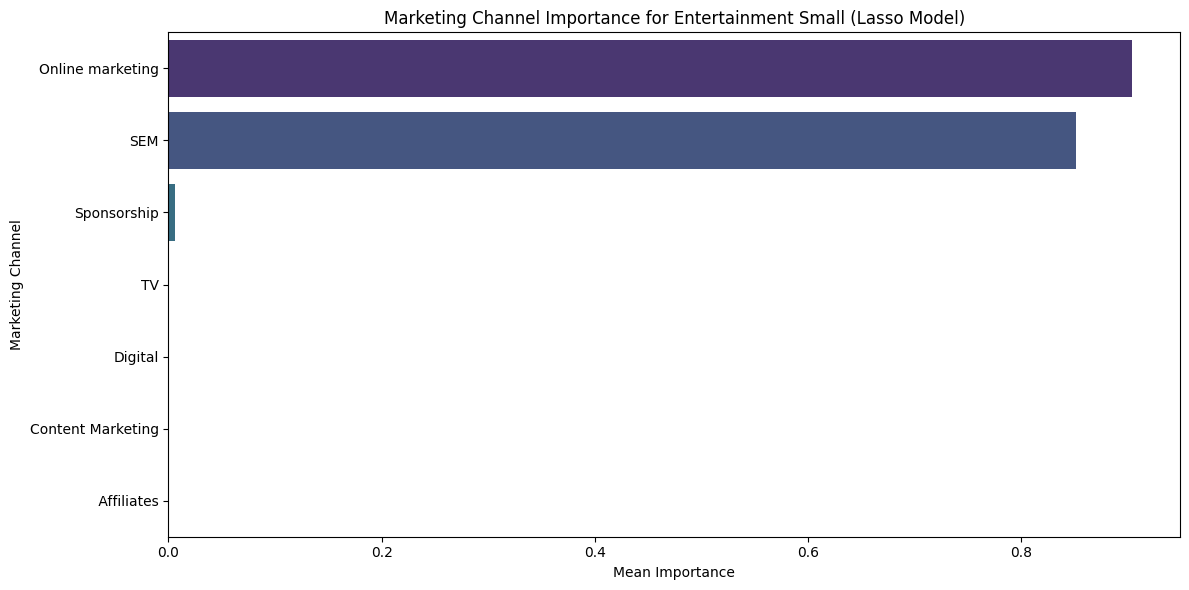

C:\Users\KRITYAPRIYA\AppData\Local\Temp\ipykernel_24108\4012455877.py:51: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




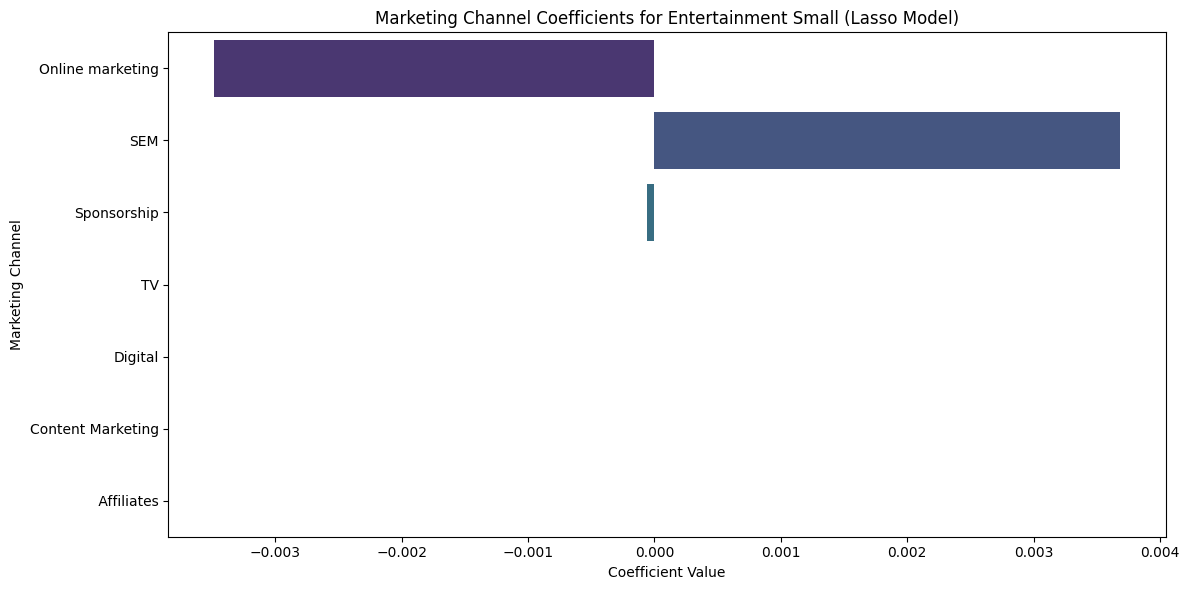

C:\Users\KRITYAPRIYA\AppData\Local\Temp\ipykernel_24108\4012455877.py:68: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




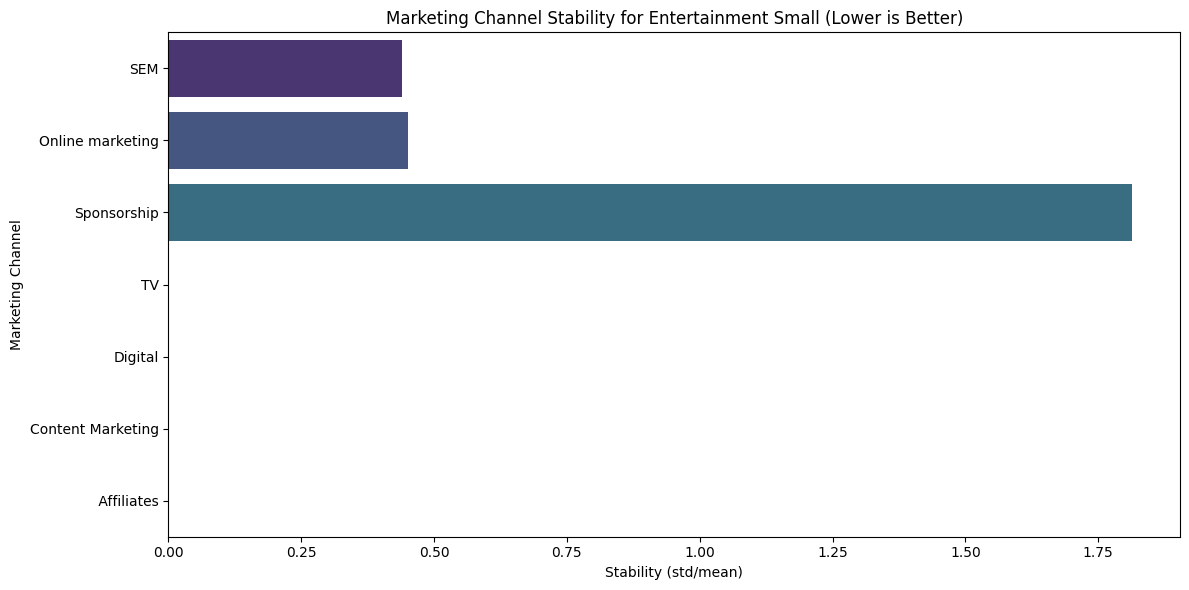


Summary Statistics for Entertainment Small:

Most Important Channels (by Permutation Importance):
            Channel  Importance_Mean
4  Online marketing         0.903906
6               SEM         0.851138
2       Sponsorship         0.006403
0                TV         0.000000
1           Digital         0.000000

Most Stable Channels (Lowest std/mean ratio):
            Channel  Stability
6               SEM   0.439816
4  Online marketing   0.451720
2       Sponsorship   1.813098
0                TV        NaN
1           Digital        NaN

Non-zero Coefficients:
            Channel  Coefficient
6               SEM     0.003686
4  Online marketing    -0.003488
2       Sponsorship    -0.000062


In [138]:
# Prepare data for Entertainment Small category
X_entertainment = df[['TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM']]
y_entertainment = df['product_analytic_category_EntertainmentSmall']

# Fill NaN values with 0
X_entertainment = X_entertainment.fillna(0)
y_entertainment = y_entertainment.fillna(0)

print("Data shape after filling NaN values:", X_entertainment.shape)
print("\nVerifying no NaN values remain:")
print(X_entertainment.isna().sum())

# Create and fit Lasso model
lasso_entertainment = Lasso(alpha=0.01, random_state=42)
lasso_entertainment.fit(X_entertainment, y_entertainment)

# Calculate permutation importance
result_entertainment = permutation_importance(
    lasso_entertainment, X_entertainment, y_entertainment,
    n_repeats=30,
    random_state=42
)

# Create importance dataframe
importance_df_entertainment = pd.DataFrame({
    'Channel': X_entertainment.columns,
    'Importance_Mean': result_entertainment.importances_mean,
    'Importance_Std': result_entertainment.importances_std,
    'Coefficient': lasso_entertainment.coef_
})

# Sort by mean importance
importance_df_entertainment = importance_df_entertainment.sort_values('Importance_Mean', ascending=False)

# Plot mean importance
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Importance_Mean',
    y='Channel',
    data=importance_df_entertainment,
    palette='viridis'
)
plt.title('Marketing Channel Importance for Entertainment Small (Lasso Model)')
plt.xlabel('Mean Importance')
plt.ylabel('Marketing Channel')
plt.tight_layout()
plt.show()

# Plot coefficients
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Coefficient',
    y='Channel',
    data=importance_df_entertainment,
    palette='viridis'
)
plt.title('Marketing Channel Coefficients for Entertainment Small (Lasso Model)')
plt.xlabel('Coefficient Value')
plt.ylabel('Marketing Channel')
plt.tight_layout()
plt.show()

# Calculate and plot stability
importance_df_entertainment['Stability'] = importance_df_entertainment['Importance_Std'] / importance_df_entertainment['Importance_Mean']
importance_df_entertainment = importance_df_entertainment.sort_values('Stability')

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Stability',
    y='Channel',
    data=importance_df_entertainment,
    palette='viridis'
)
plt.title('Marketing Channel Stability for Entertainment Small (Lower is Better)')
plt.xlabel('Stability (std/mean)')
plt.ylabel('Marketing Channel')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for Entertainment Small:")
print("\nMost Important Channels (by Permutation Importance):")
print(importance_df_entertainment.sort_values('Importance_Mean', ascending=False)[['Channel', 'Importance_Mean']].head())

print("\nMost Stable Channels (Lowest std/mean ratio):")
print(importance_df_entertainment.sort_values('Stability')[['Channel', 'Stability']].head())

print("\nNon-zero Coefficients:")
print(importance_df_entertainment[importance_df_entertainment['Coefficient'] != 0][['Channel', 'Coefficient']])

C:\Users\KRITYAPRIYA\AppData\Local\Temp\ipykernel_24108\1395861295.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




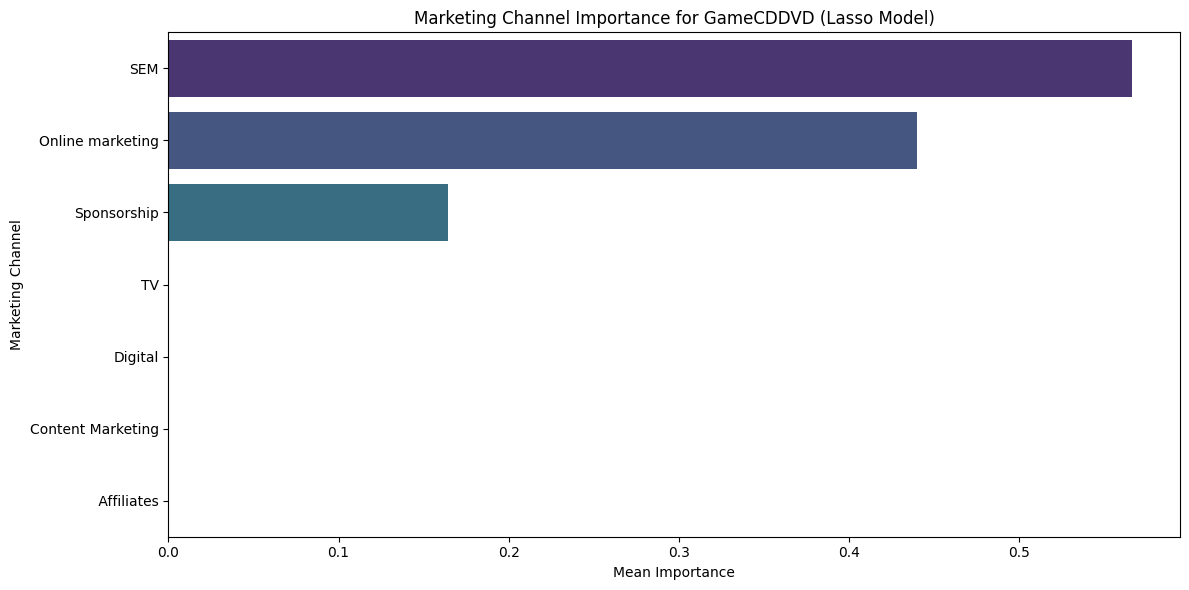

C:\Users\KRITYAPRIYA\AppData\Local\Temp\ipykernel_24108\1395861295.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




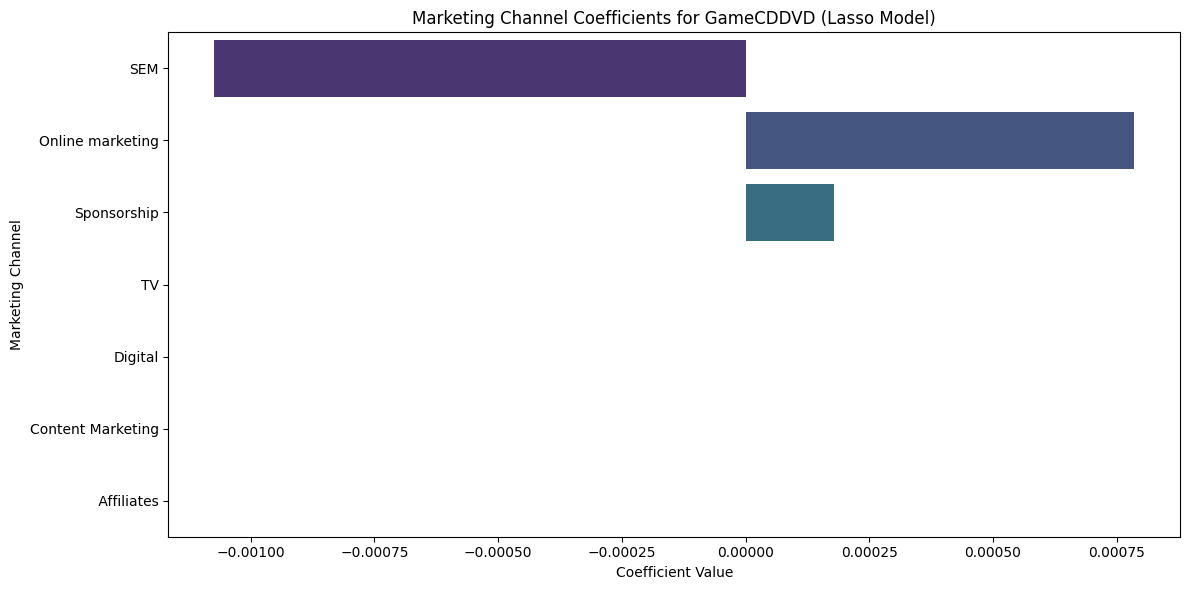

C:\Users\KRITYAPRIYA\AppData\Local\Temp\ipykernel_24108\1395861295.py:56: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




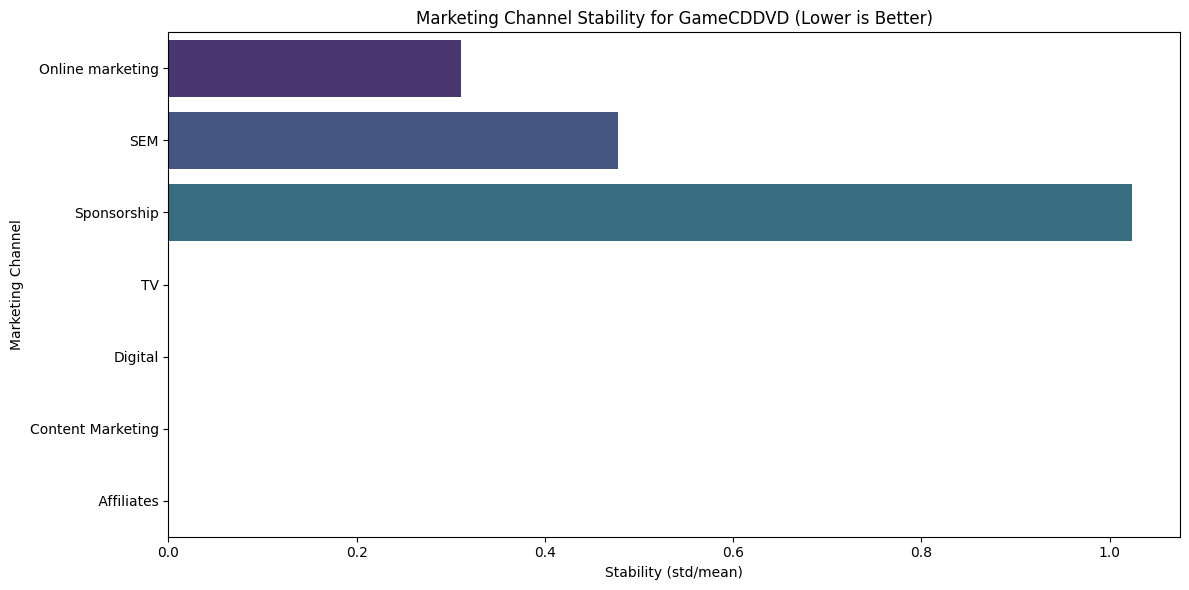


Summary Statistics for GameCDDVD:

Most Important Channels (by Permutation Importance):
            Channel  Importance_Mean
6               SEM         0.566119
4  Online marketing         0.439665
2       Sponsorship         0.164033
0                TV         0.000000
1           Digital         0.000000

Most Stable Channels (Lowest std/mean ratio):
            Channel  Stability
4  Online marketing   0.310975
6               SEM   0.477443
2       Sponsorship   1.023483
0                TV        NaN
1           Digital        NaN

Non-zero Coefficients:
            Channel  Coefficient
4  Online marketing     0.000785
6               SEM    -0.001073
2       Sponsorship     0.000180


In [139]:
# Prepare data for GameCDDVD category
X_game = df[['TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM']].fillna(0)
y_game = df['product_analytic_category_GameCDDVD'].fillna(0)

# Create and fit Lasso model
lasso_game = Lasso(alpha=0.01, random_state=42)
lasso_game.fit(X_game, y_game)

# Calculate permutation importance
result_game = permutation_importance(lasso_game, X_game, y_game, n_repeats=10, random_state=42)

# Create DataFrame with importance metrics
importance_df_game = pd.DataFrame({
    'Channel': X_game.columns,
    'Importance_Mean': result_game.importances_mean,
    'Importance_Std': result_game.importances_std,
    'Coefficient': lasso_game.coef_
})

# Sort by mean importance
importance_df_game = importance_df_game.sort_values('Importance_Mean', ascending=False)

# Plot mean importance
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Importance_Mean',
    y='Channel',
    data=importance_df_game,
    palette='viridis'
)
plt.title('Marketing Channel Importance for GameCDDVD (Lasso Model)')
plt.xlabel('Mean Importance')
plt.ylabel('Marketing Channel')
plt.tight_layout()
plt.show()

# Plot coefficients
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Coefficient',
    y='Channel',
    data=importance_df_game,
    palette='viridis'
)
plt.title('Marketing Channel Coefficients for GameCDDVD (Lasso Model)')
plt.xlabel('Coefficient Value')
plt.ylabel('Marketing Channel')
plt.tight_layout()
plt.show()

# Calculate and plot stability
importance_df_game['Stability'] = importance_df_game['Importance_Std'] / importance_df_game['Importance_Mean']
importance_df_game = importance_df_game.sort_values('Stability')

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Stability',
    y='Channel',
    data=importance_df_game,
    palette='viridis'
)
plt.title('Marketing Channel Stability for GameCDDVD (Lower is Better)')
plt.xlabel('Stability (std/mean)')
plt.ylabel('Marketing Channel')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for GameCDDVD:")
print("\nMost Important Channels (by Permutation Importance):")
print(importance_df_game.sort_values('Importance_Mean', ascending=False)[['Channel', 'Importance_Mean']].head())

print("\nMost Stable Channels (Lowest std/mean ratio):")
print(importance_df_game.sort_values('Stability')[['Channel', 'Stability']].head())

print("\nNon-zero Coefficients:")
print(importance_df_game[importance_df_game['Coefficient'] != 0][['Channel', 'Coefficient']])


C:\Users\KRITYAPRIYA\AppData\Local\Temp\ipykernel_24108\1909448273.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




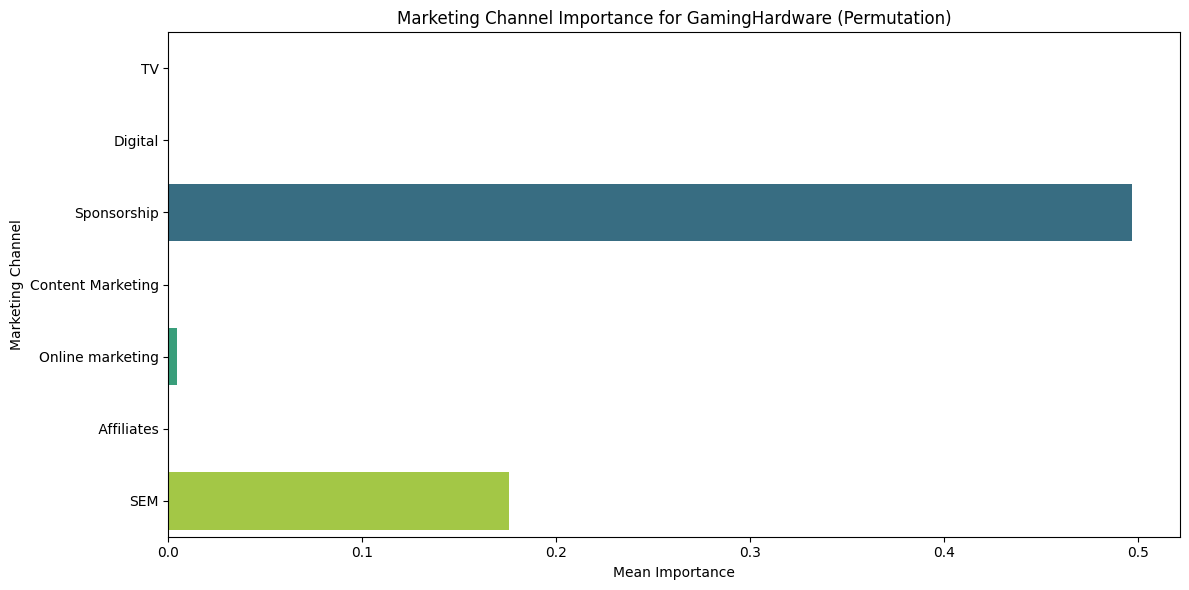

C:\Users\KRITYAPRIYA\AppData\Local\Temp\ipykernel_24108\1909448273.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




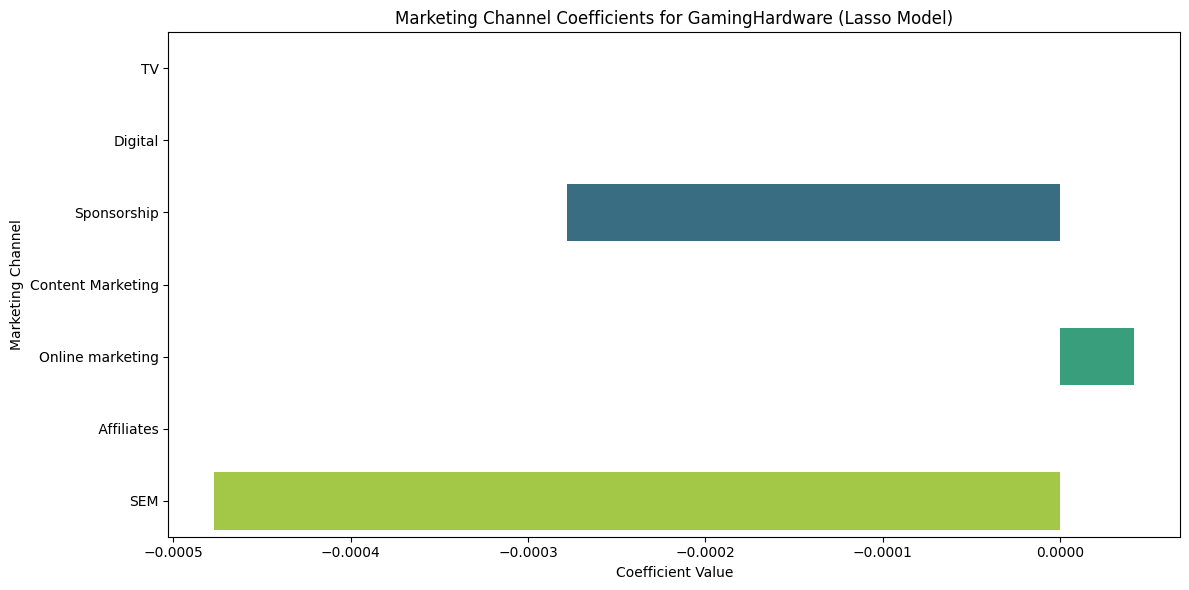

C:\Users\KRITYAPRIYA\AppData\Local\Temp\ipykernel_24108\1909448273.py:54: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




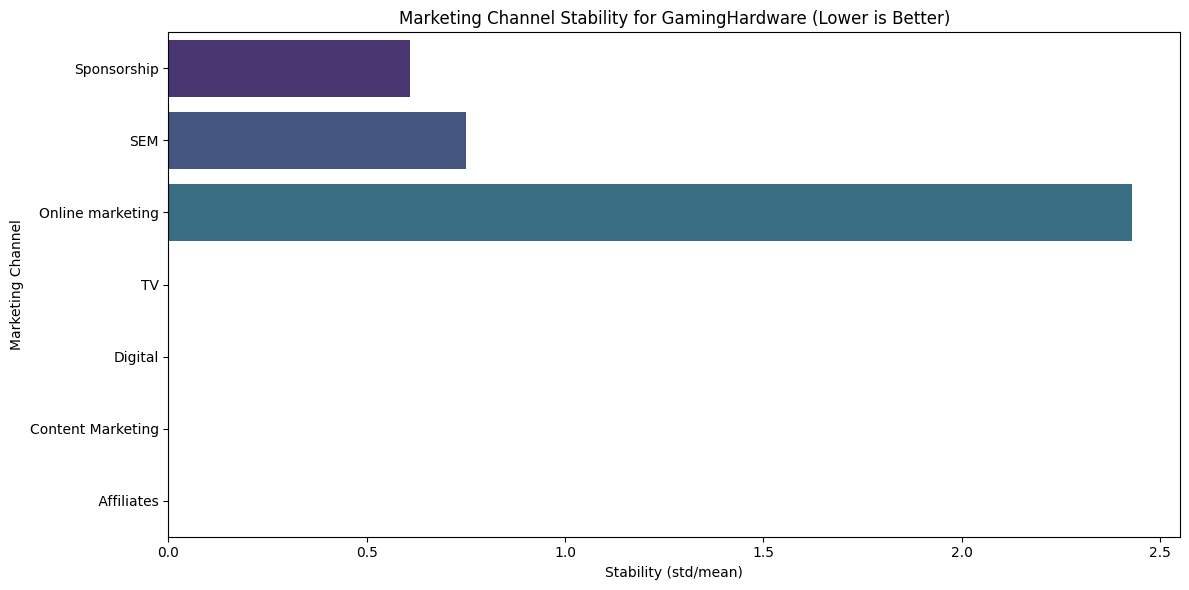


Summary Statistics for GamingHardware:

Most Important Channels (by Permutation Importance):
            Channel  Importance_Mean
2       Sponsorship         0.496720
6               SEM         0.175599
4  Online marketing         0.004179
0                TV         0.000000
1           Digital         0.000000

Most Stable Channels (Lowest std/mean ratio):
            Channel  Stability
2       Sponsorship   0.609466
6               SEM   0.750804
4  Online marketing   2.429055
0                TV        NaN
1           Digital        NaN

Non-zero Coefficients:
            Channel  Coefficient
2       Sponsorship    -0.000278
6               SEM    -0.000477
4  Online marketing     0.000042


In [140]:
# Prepare data for GamingHardware category
X_hardware = df[['TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates', 'SEM']]
y_hardware = df['product_analytic_category_GamingHardware']
X_hardware = X_hardware.fillna(0)
y_hardware = y_hardware.fillna(0)
# Initialize and fit Lasso model
lasso_hardware = Lasso(alpha=0.01, random_state=42)
lasso_hardware.fit(X_hardware, y_hardware)

# Calculate permutation importance
result_hardware = permutation_importance(lasso_hardware, X_hardware, y_hardware, n_repeats=30, random_state=42)

# Create importance dataframe
importance_df_hardware = pd.DataFrame({
    'Channel': X_hardware.columns,
    'Importance_Mean': result_hardware.importances_mean,
    'Importance_Std': result_hardware.importances_std,
    'Coefficient': lasso_hardware.coef_
})

# Plot permutation importance
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Importance_Mean',
    y='Channel',
    data=importance_df_hardware,
    palette='viridis'
)
plt.title('Marketing Channel Importance for GamingHardware (Permutation)')
plt.xlabel('Mean Importance')
plt.ylabel('Marketing Channel')
plt.tight_layout()
plt.show()

# Plot coefficients
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Coefficient',
    y='Channel',
    data=importance_df_hardware,
    palette='viridis'
)
plt.title('Marketing Channel Coefficients for GamingHardware (Lasso Model)')
plt.xlabel('Coefficient Value')
plt.ylabel('Marketing Channel')
plt.tight_layout()
plt.show()

# Calculate and plot stability
importance_df_hardware['Stability'] = importance_df_hardware['Importance_Std'] / importance_df_hardware['Importance_Mean']
importance_df_hardware = importance_df_hardware.sort_values('Stability')

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Stability',
    y='Channel',
    data=importance_df_hardware,
    palette='viridis'
)
plt.title('Marketing Channel Stability for GamingHardware (Lower is Better)')
plt.xlabel('Stability (std/mean)')
plt.ylabel('Marketing Channel')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for GamingHardware:")
print("\nMost Important Channels (by Permutation Importance):")
print(importance_df_hardware.sort_values('Importance_Mean', ascending=False)[['Channel', 'Importance_Mean']].head())

print("\nMost Stable Channels (Lowest std/mean ratio):")
print(importance_df_hardware.sort_values('Stability')[['Channel', 'Stability']].head())

print("\nNon-zero Coefficients:")
print(importance_df_hardware[importance_df_hardware['Coefficient'] != 0][['Channel', 'Coefficient']])
